# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis

# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv
data = pd.read_csv('/Users/anusha/Downloads/Starter Notebook - EDA NYC Taxi/LR_Assignment/porter_data_1.csv')
data.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [12]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format


data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])



##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [14]:
# Convert categorical features to category type

data['store_primary_category'] = data['store_primary_category'].astype('category')
data['order_protocol'] = data['order_protocol'].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [17]:
# Calculate time taken in minutes

data['time_taken'] = (data['actual_delivery_time'] - data['created_at']).dt.total_seconds() / 60


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [19]:
# Extract the hour and day of week from the 'created_at' timestamp

data['order_hour'] = data['created_at'].dt.hour
data['order_day_of_week'] = data['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
data['isWeekend'] = data['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)




In [20]:
# Drop unnecessary columns
data.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [23]:
# Define target variable (y) and features (X)

y = data['time_taken']
X = data.drop(columns=['time_taken'])



##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [25]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [28]:

# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day_of_week']
categorical_cols = ['store_primary_category', 'order_protocol', 'isWeekend']



##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

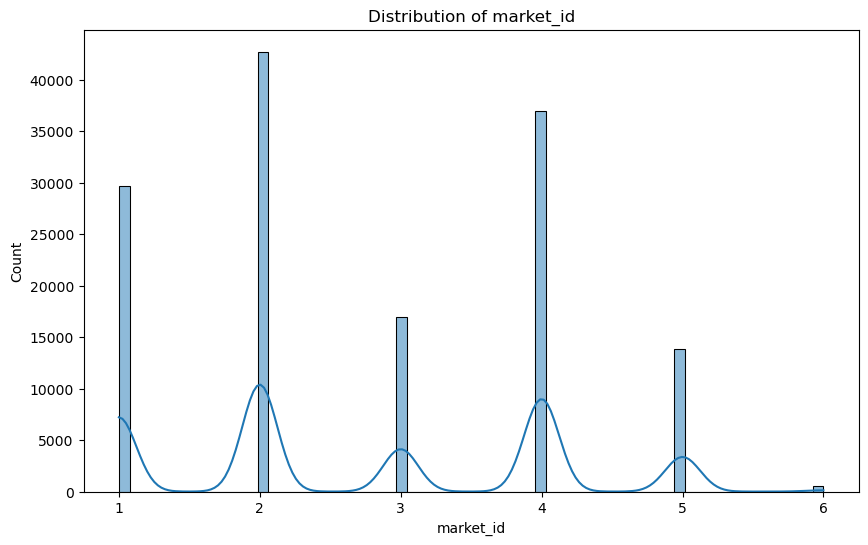

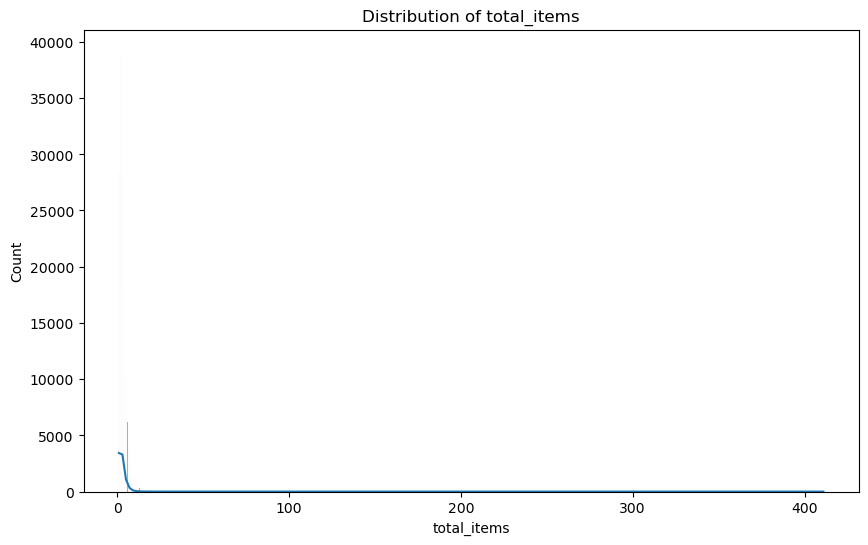

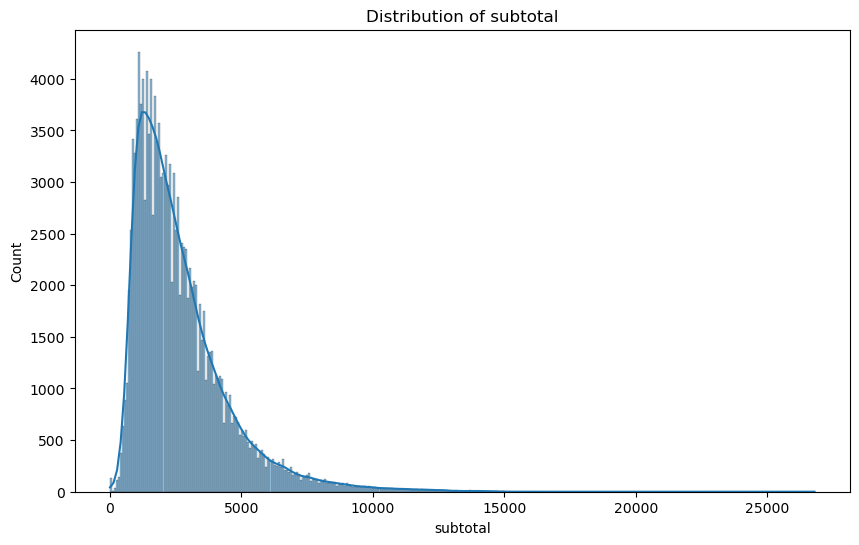

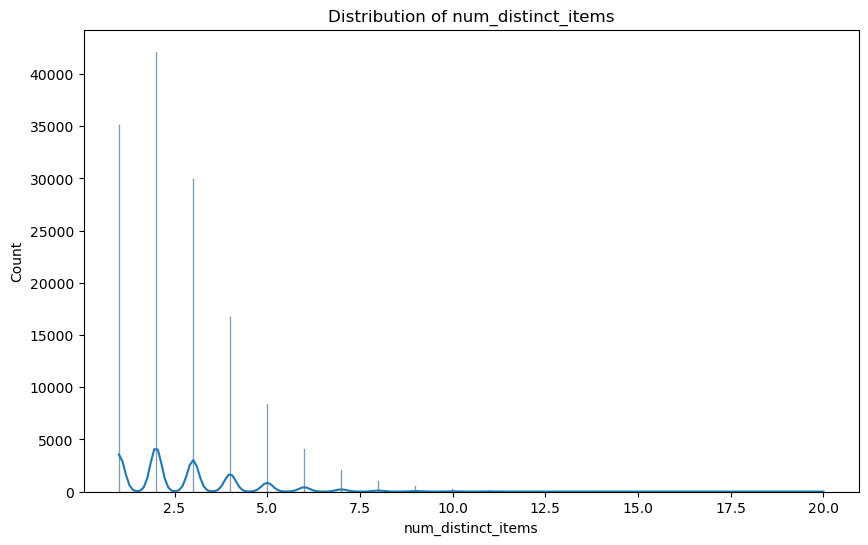

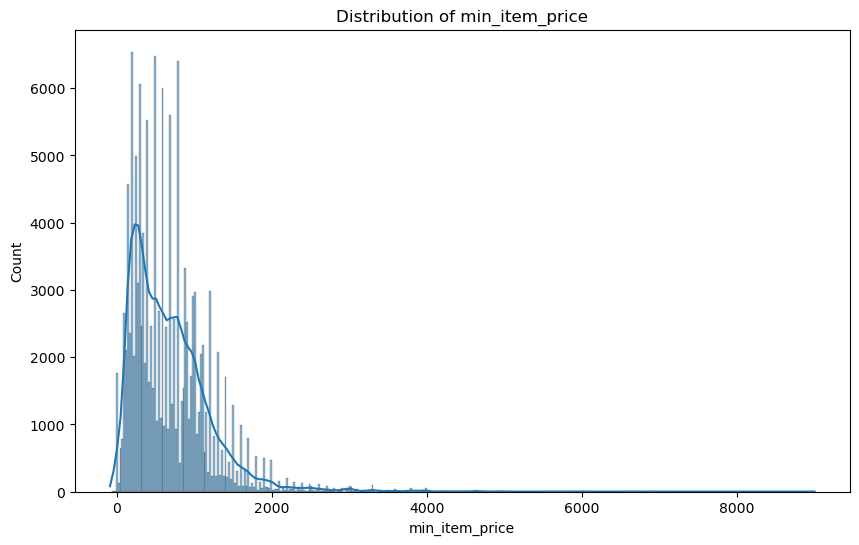

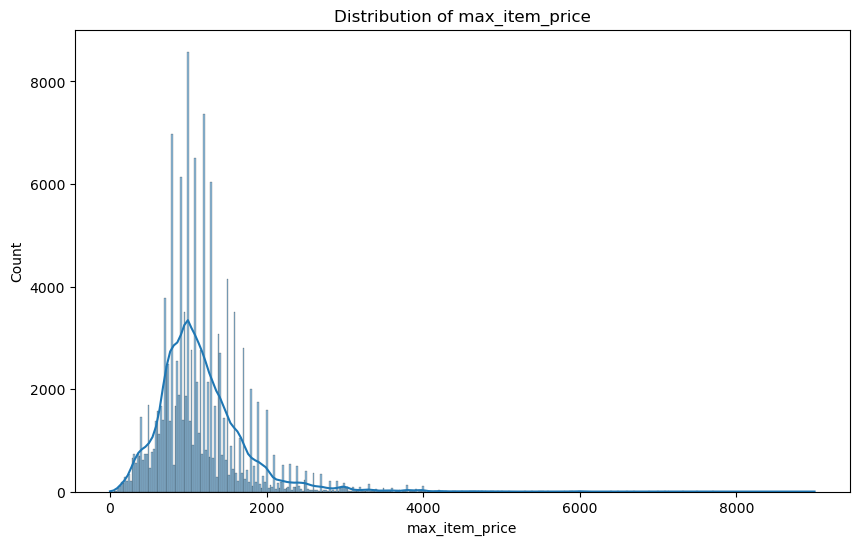

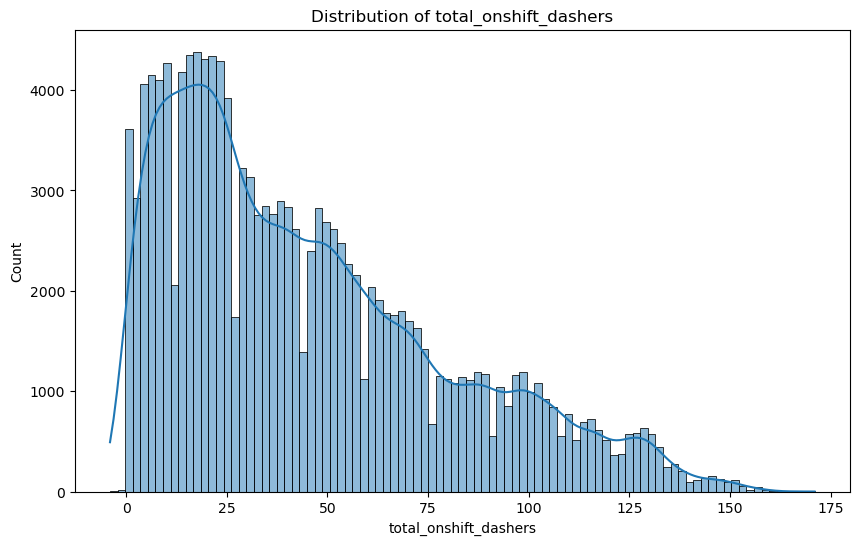

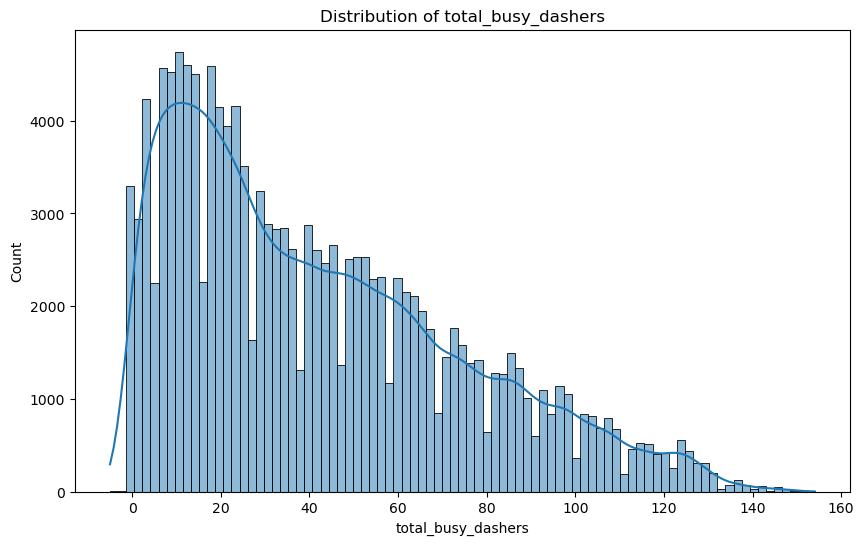

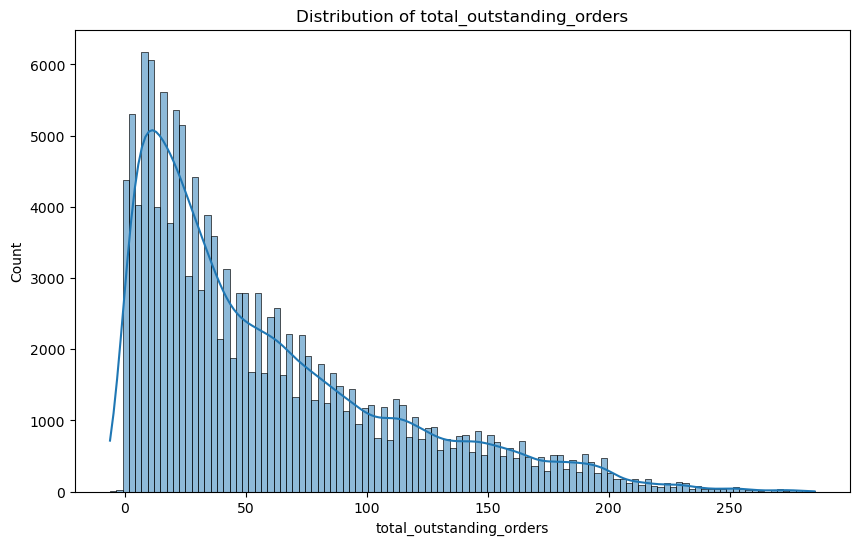

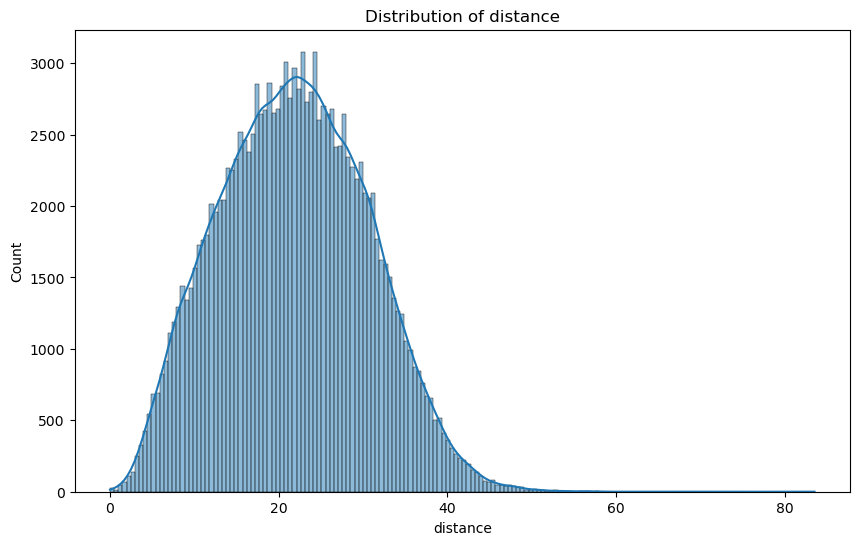

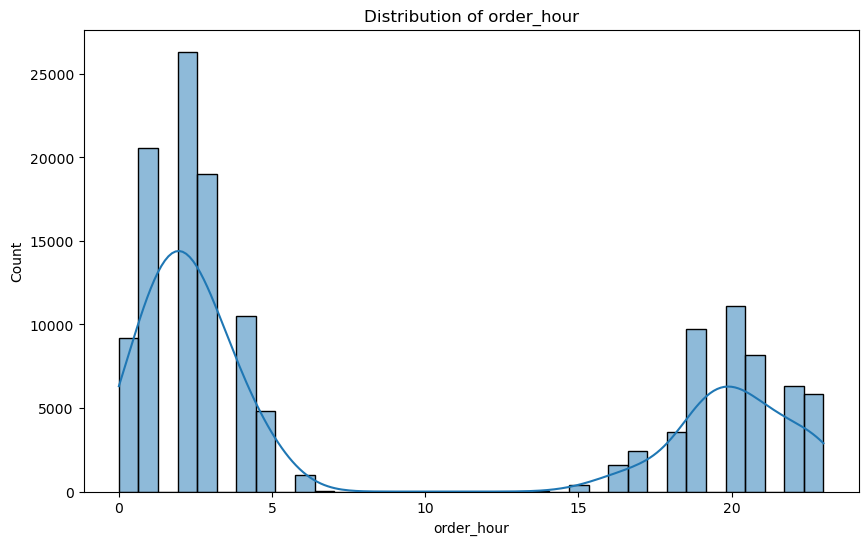

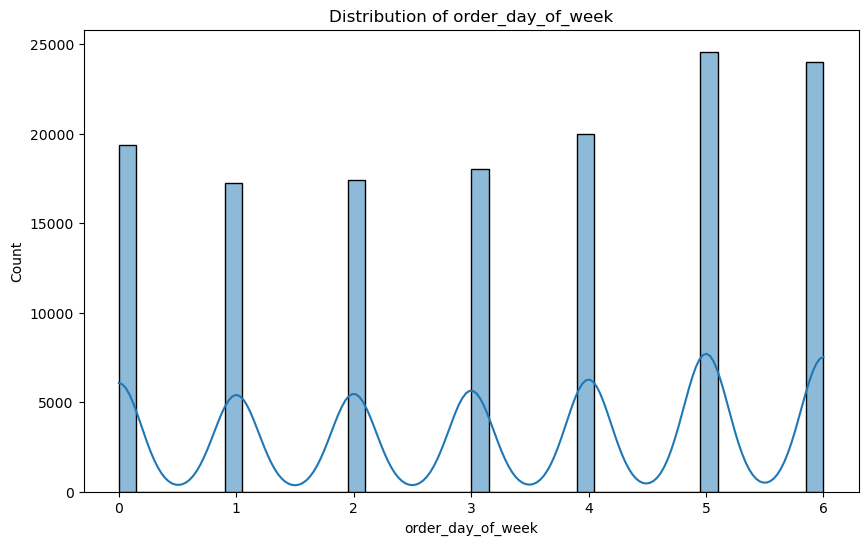

In [30]:
# Plot distributions for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [32]:
# Distribution of categorical columns
Distribution_of_distance
Distribution_of_total_outstanding_orders
Distribution_of_total_busy_dashers
Distribution_of_subtotal
Distribution_of_max_item_price
Distribution_of_min_item_price


NameError: name 'Distribution_of_distance' is not defined

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

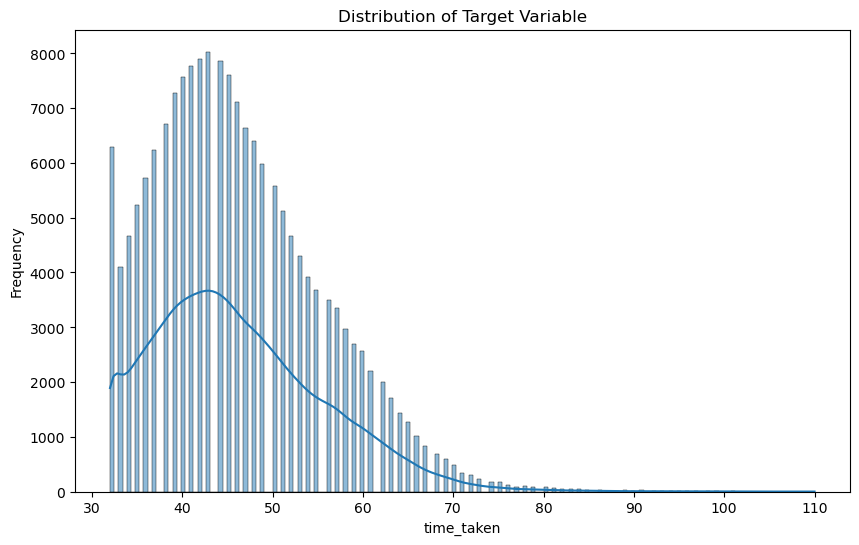

In [40]:
# Distribution of time_taken


# Checking the distribution of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    print(f"Distribution of {feature}:")
    print(data[feature].value_counts())
    print("\n")

# Visualising the distribution of the target variable
target_variable = 'time_taken'  # Replace with the actual target column name
plt.figure(figsize=(10, 6))
sns.histplot(data[target_variable], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel(target_variable)
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

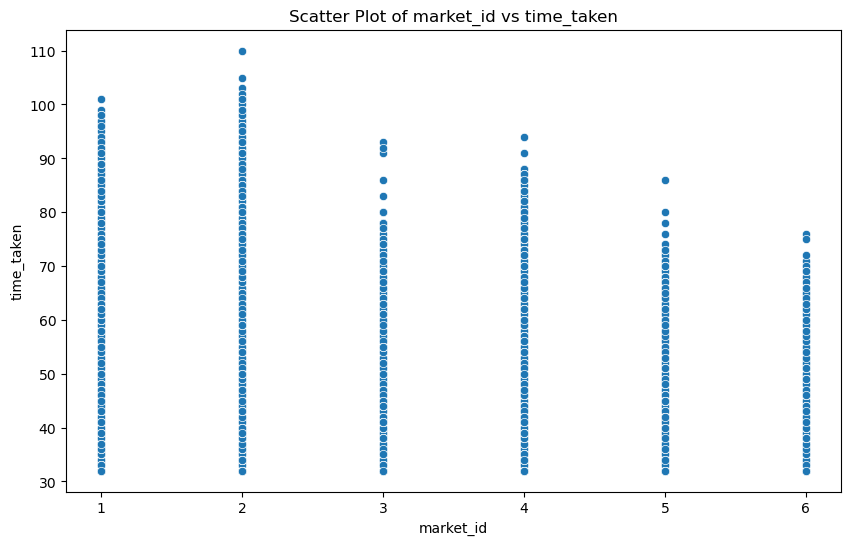

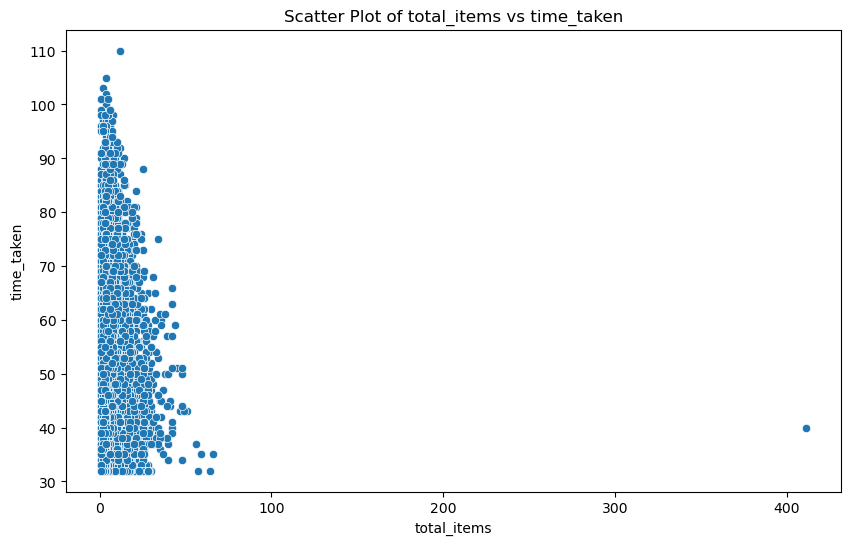

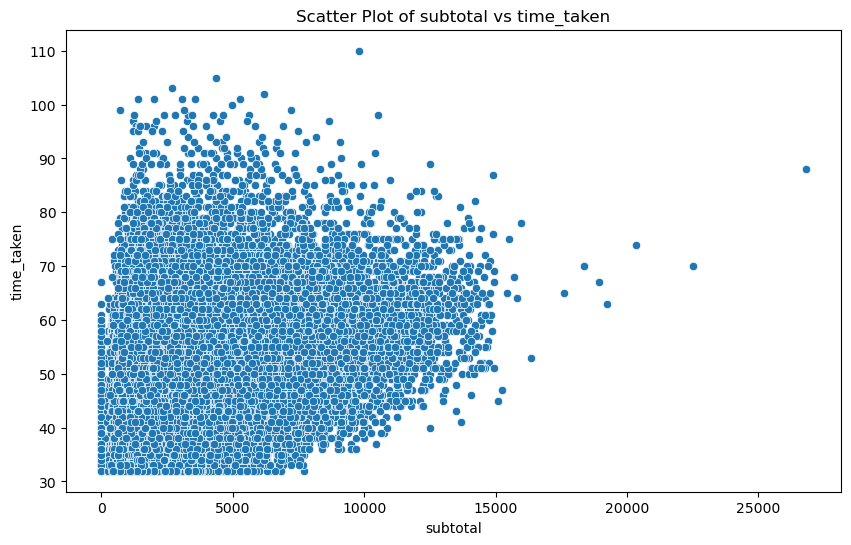

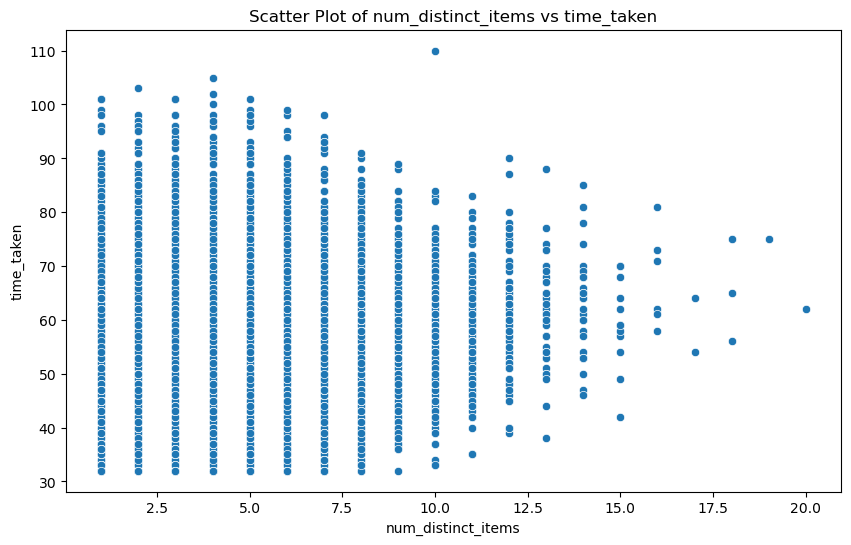

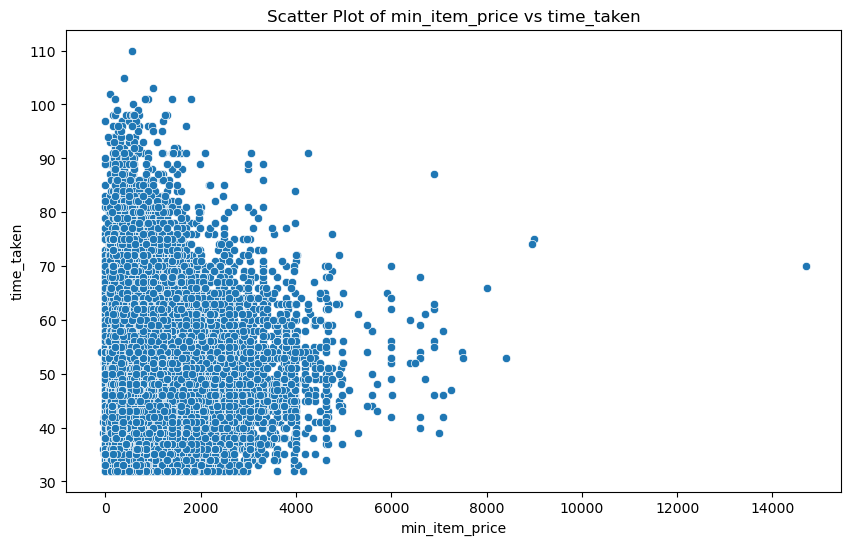

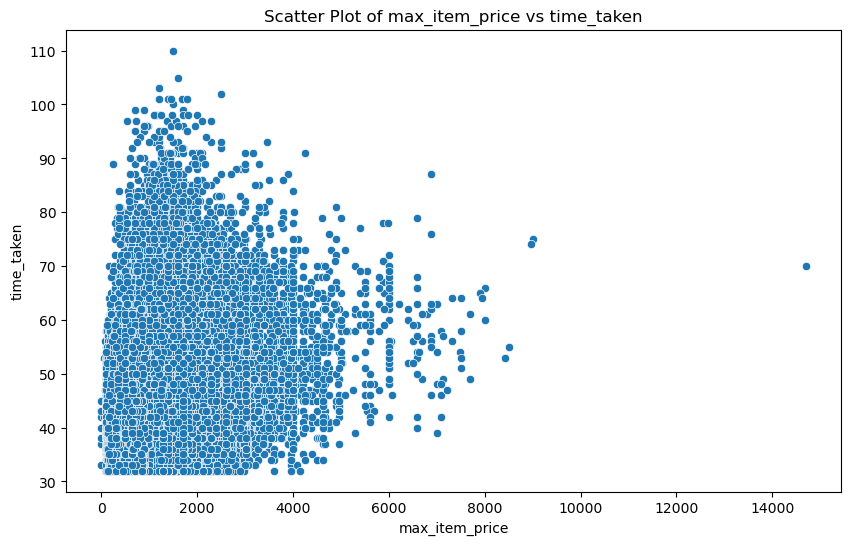

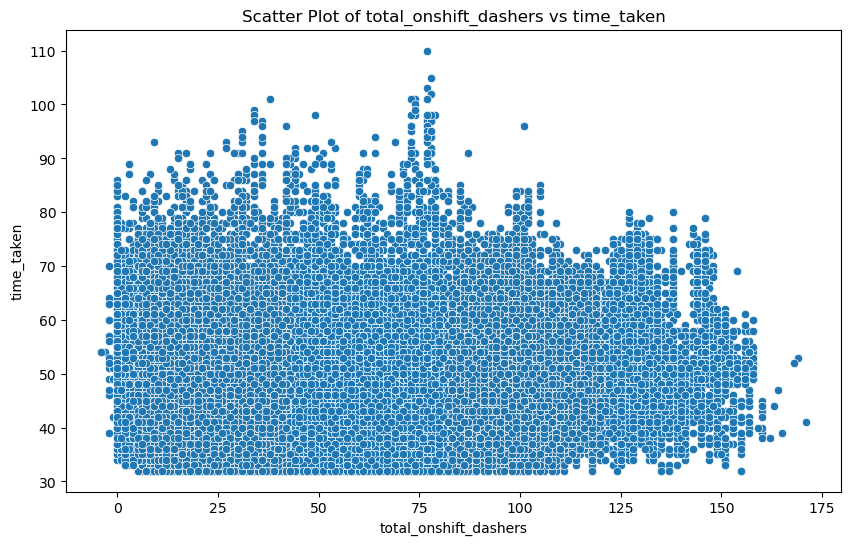

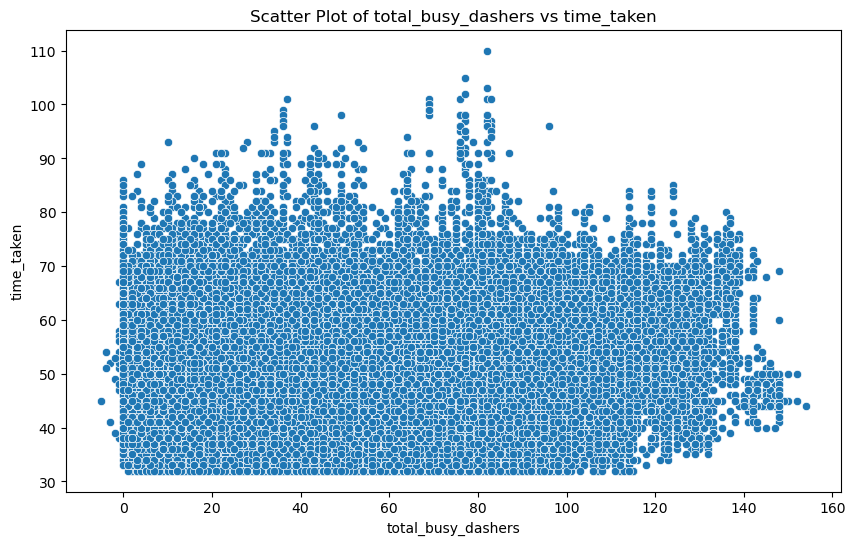

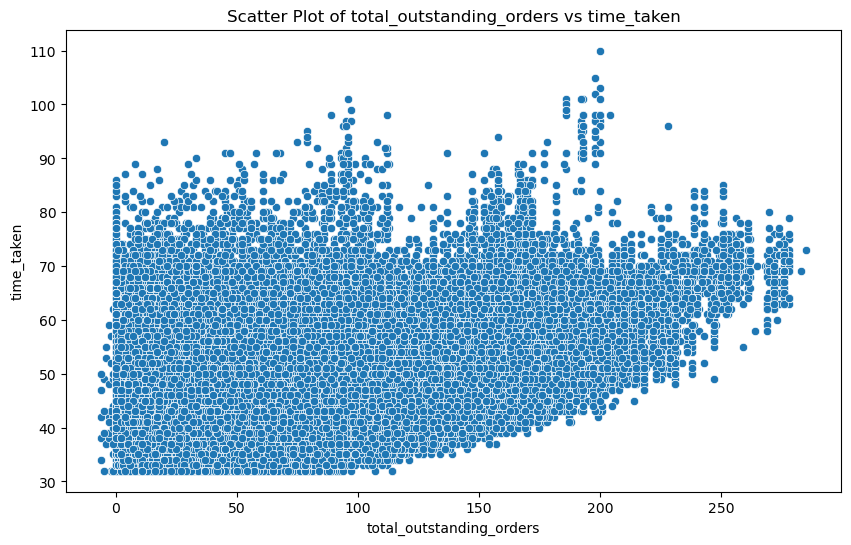

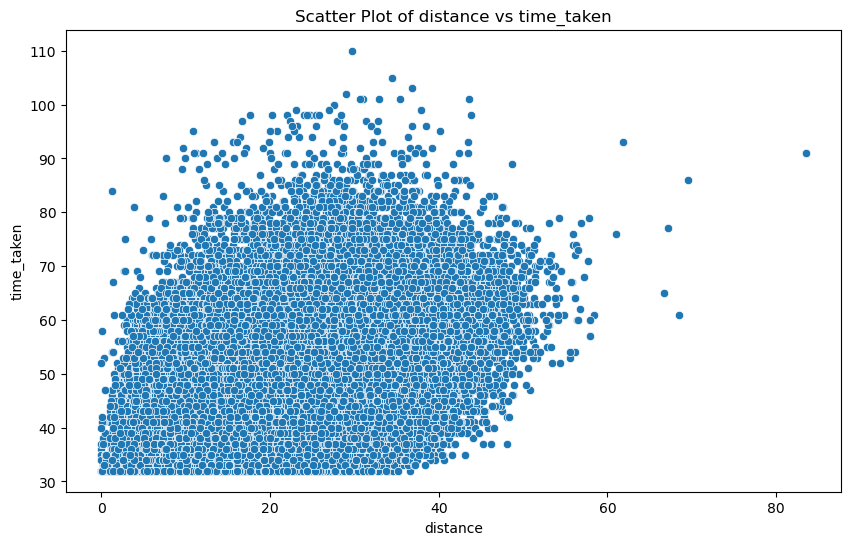

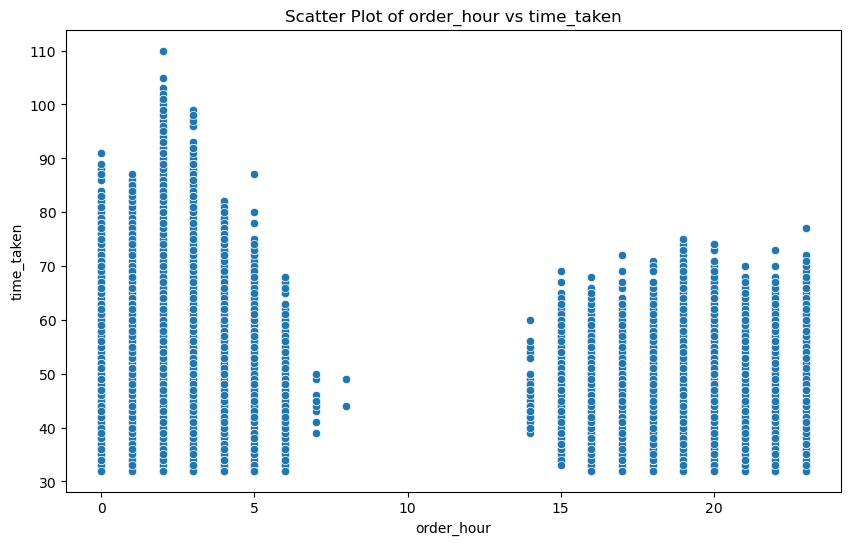

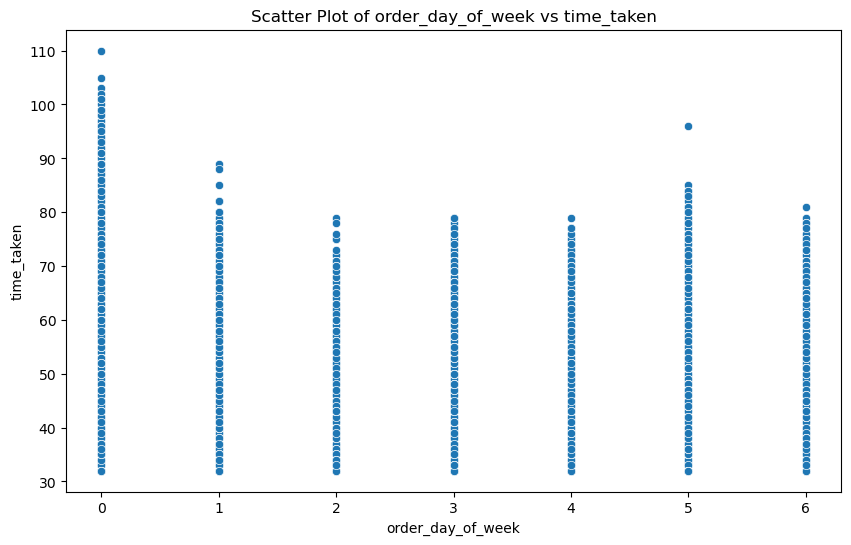

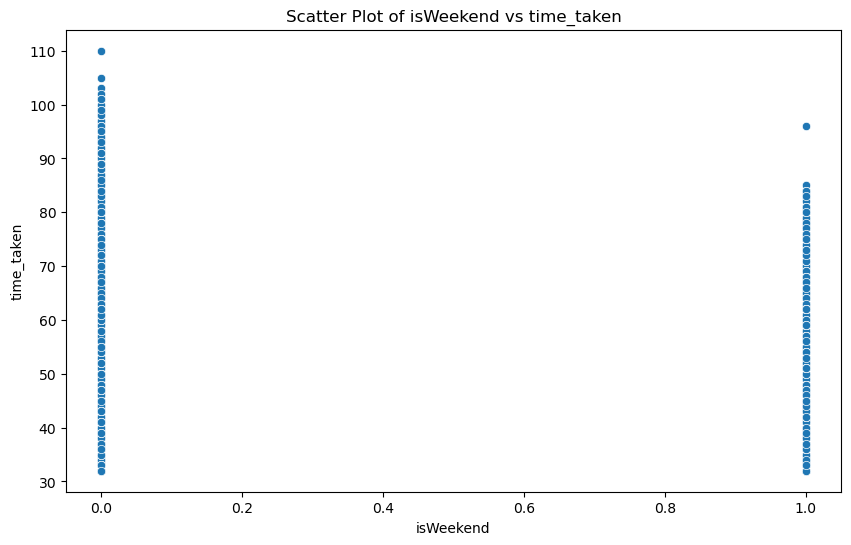

In [44]:
# Scatter plot to visualise the relationship between time_taken and other features
#Scatter plots for important numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns

for feature in numerical_features:
    if feature != target_variable:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data[feature], y=data[target_variable])
        plt.title(f'Scatter Plot of {feature} vs {target_variable}')
        plt.xlabel(feature)
        plt.ylabel(target_variable)
        plt.show()

# Scatter plots for important categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data[target_variable])
    plt.title(f'Scatter Plot of {feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()


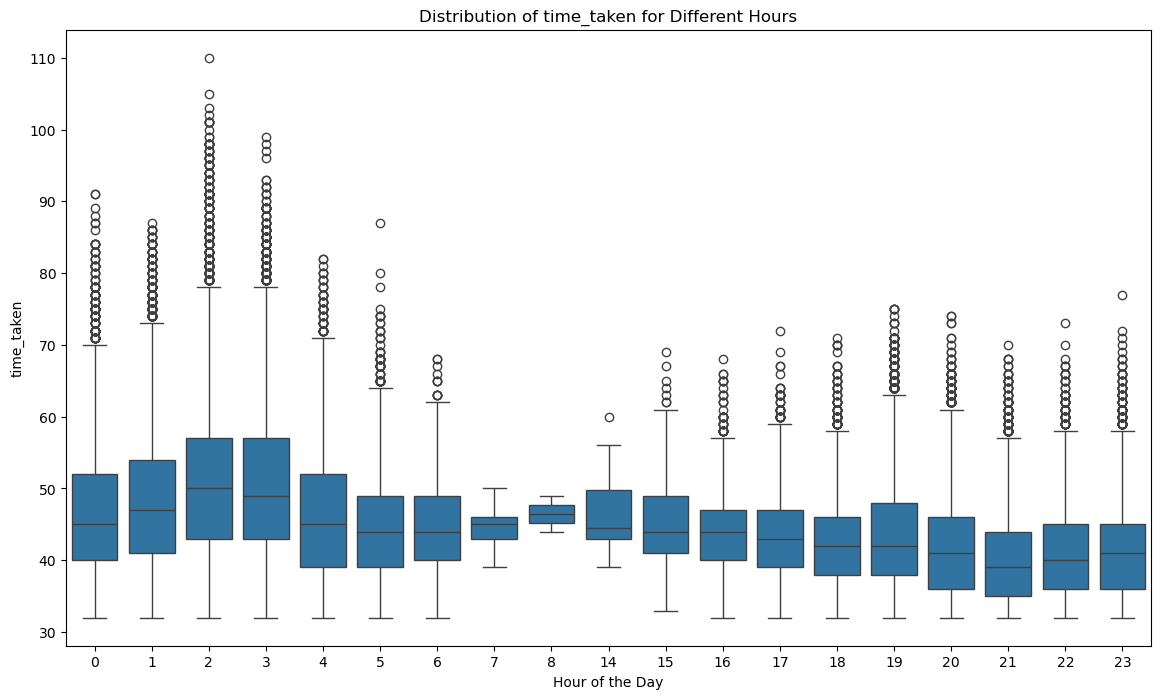

In [45]:
# Show the distribution of time_taken for different hours

# Showing the distribution of time_taken for different hours
plt.figure(figsize=(14, 8))
sns.boxplot(x='order_hour', y=target_variable, data=data)
plt.title('Distribution of time_taken for Different Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('time_taken')
plt.show()



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

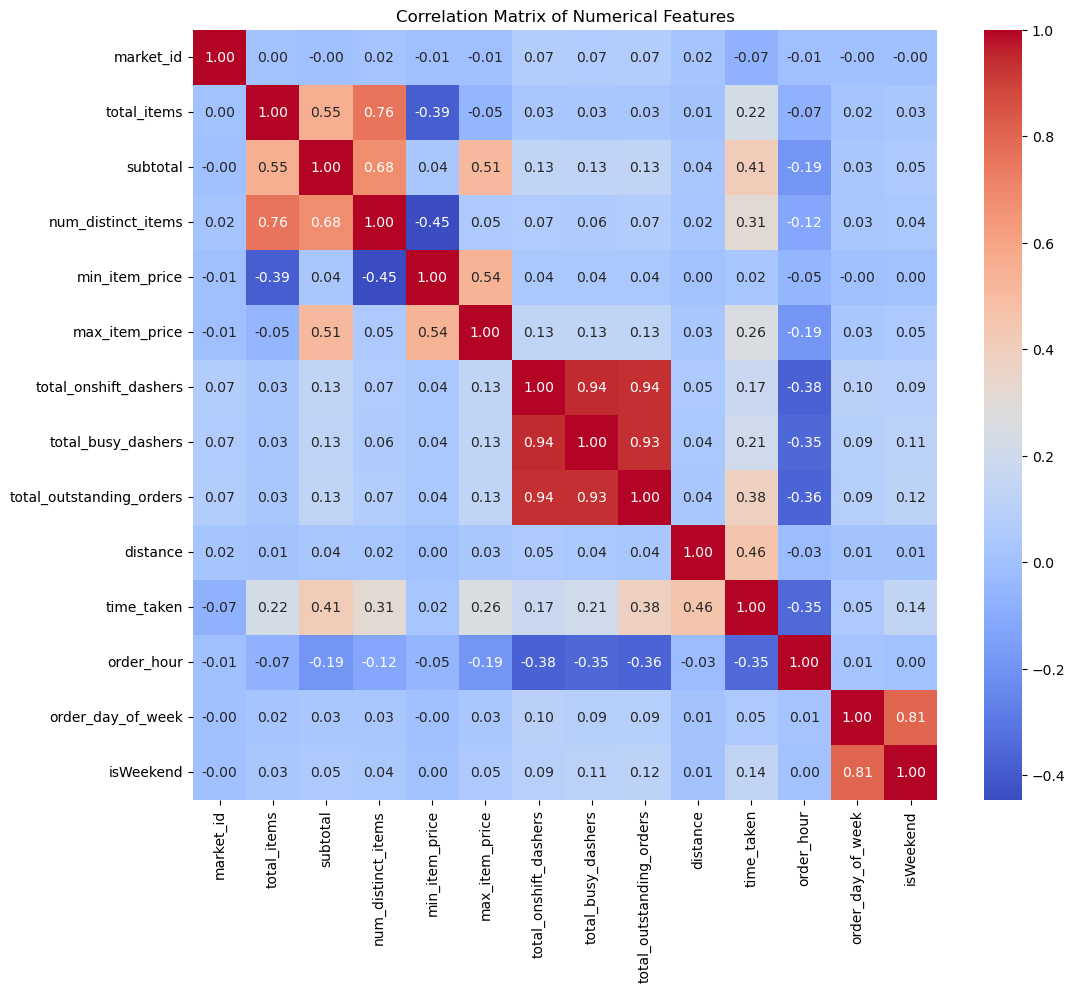

In [48]:
# Plot the heatmap of the correlation matrix

# Checking correlations between numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numerical_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [53]:
# Drop 3-5 weakly correlated columns from training dataset
# Drop 3-5 weakly correlated columns from training dataset


# Identifying variables strongly related to time_taken
correlations_with_target = correlation_matrix['time_taken'].sort_values(ascending=False)
print("Correlations with time_taken:")
print(correlations_with_target)

# Dropping columns with weak correlations with the target variable
threshold = 0.1 
weak_correlations = correlations_with_target[abs(correlations_with_target) < threshold].index
#data = data.drop(columns=weak_correlations)

print("Columns dropped due to weak correlations:", weak_correlations)
print("Remaining columns:", data.columns)


Correlations with time_taken:
time_taken                  1.000000
distance                    0.460173
subtotal                    0.413267
total_outstanding_orders    0.384999
num_distinct_items          0.312055
max_item_price              0.255167
total_items                 0.224856
total_busy_dashers          0.206045
total_onshift_dashers       0.171015
isWeekend                   0.136414
order_day_of_week           0.045878
min_item_price              0.022753
market_id                  -0.073016
order_hour                 -0.346366
Name: time_taken, dtype: float64
Columns dropped due to weak correlations: Index(['order_day_of_week', 'min_item_price', 'market_id'], dtype='object')
Remaining columns: Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken', 'order_hour

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

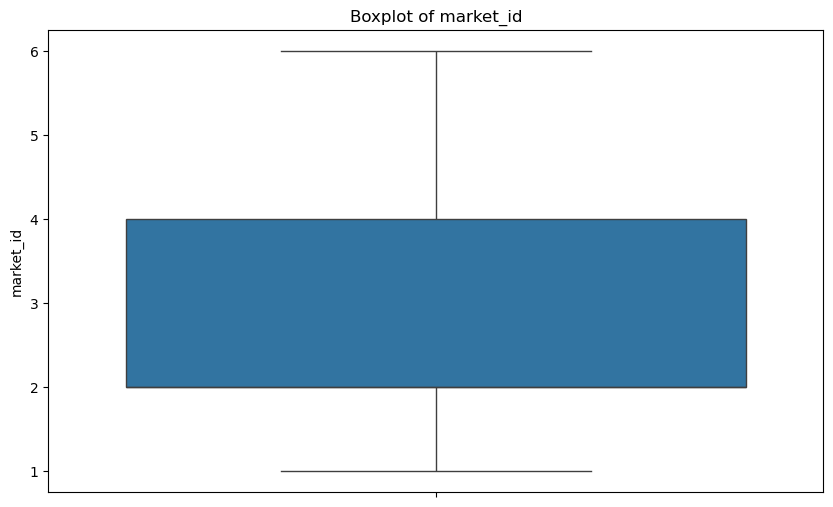

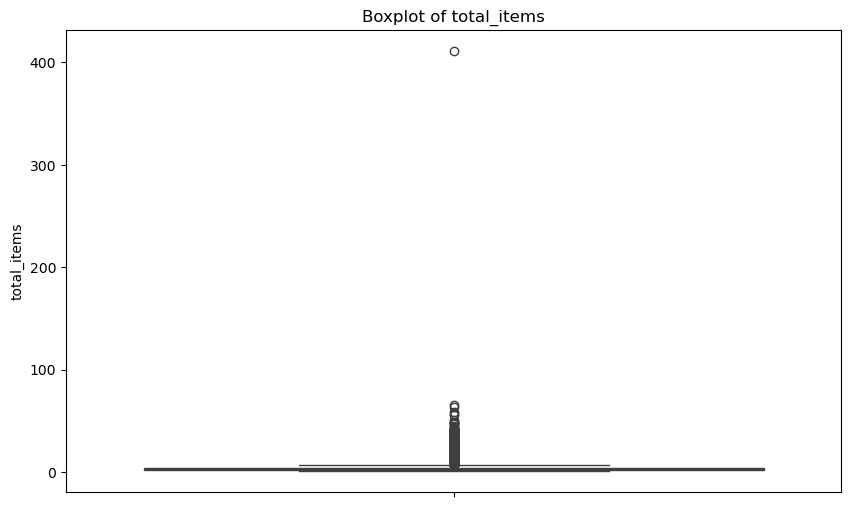

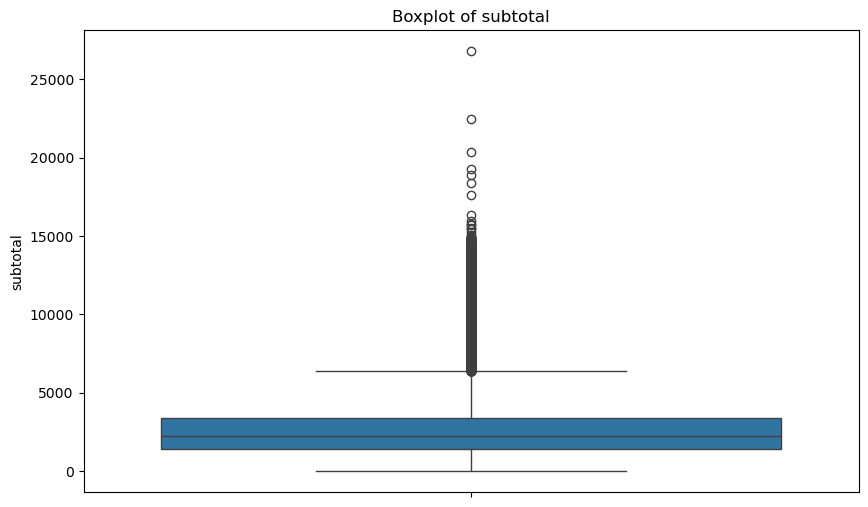

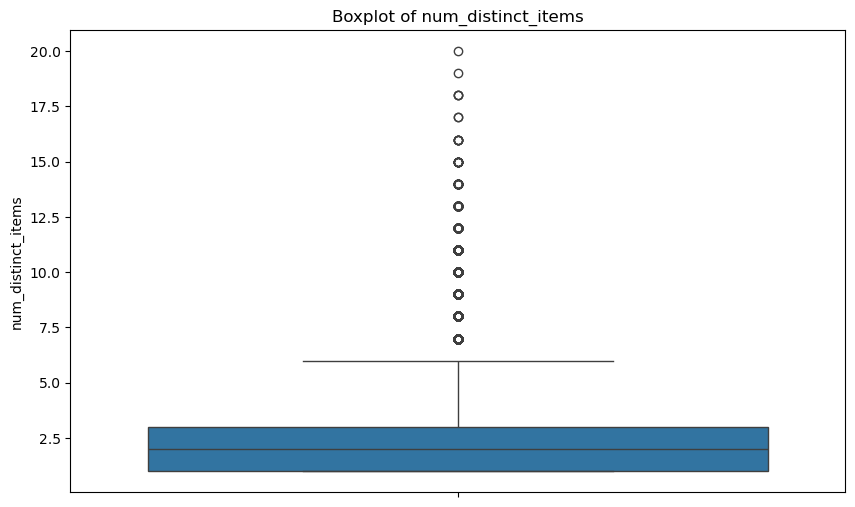

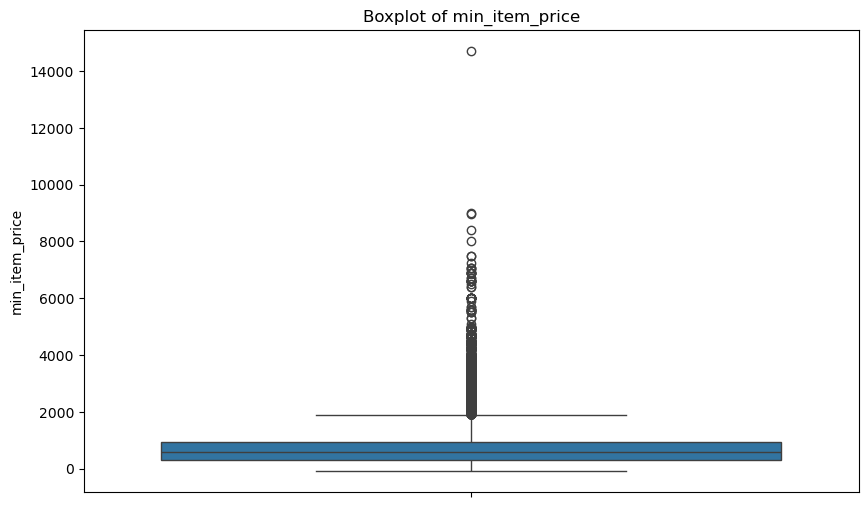

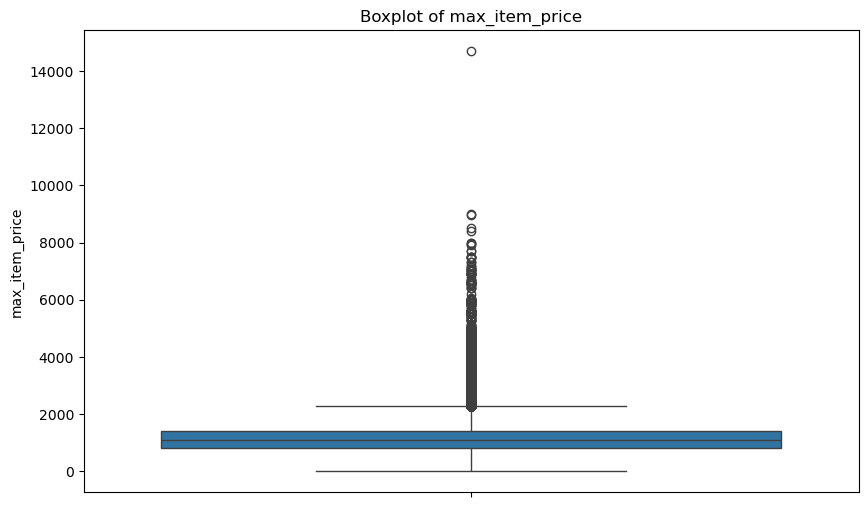

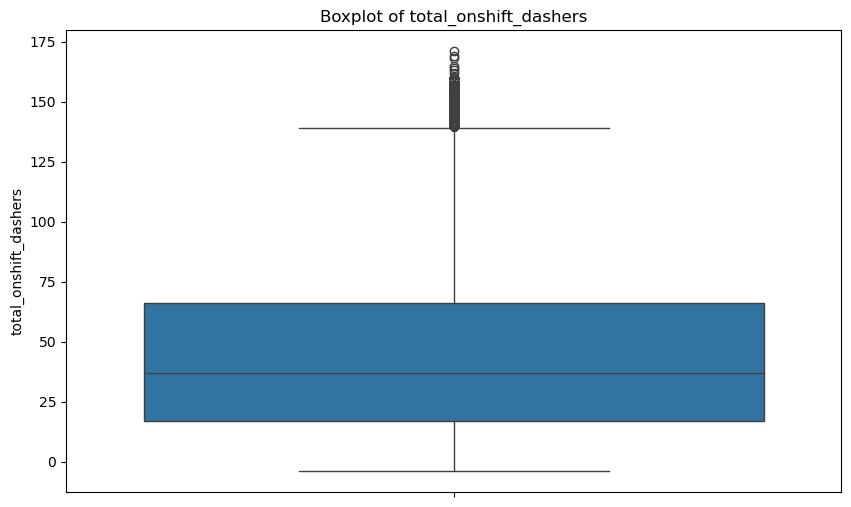

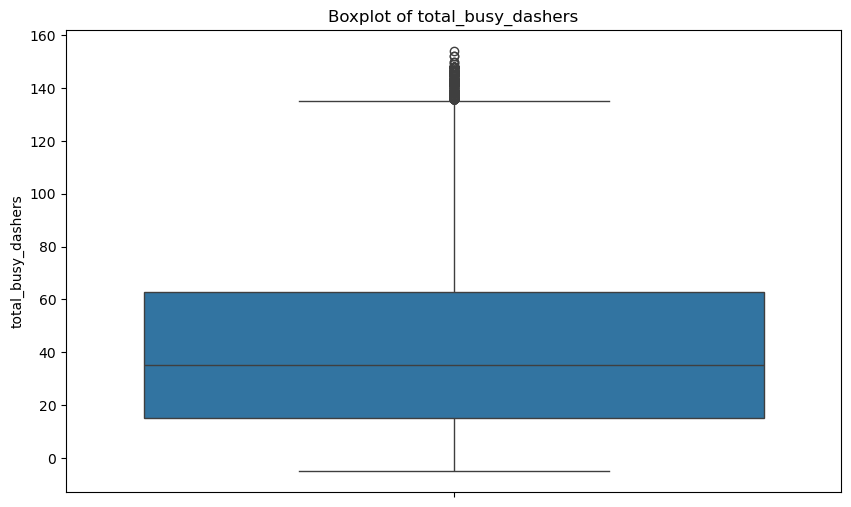

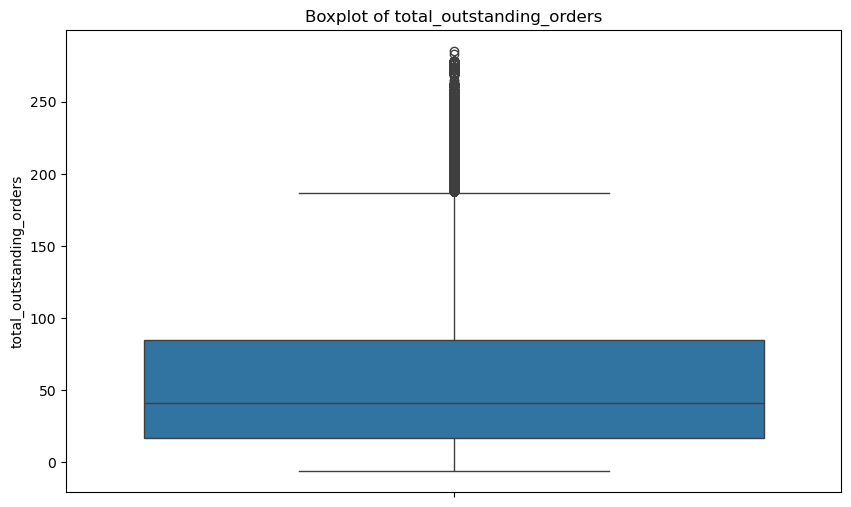

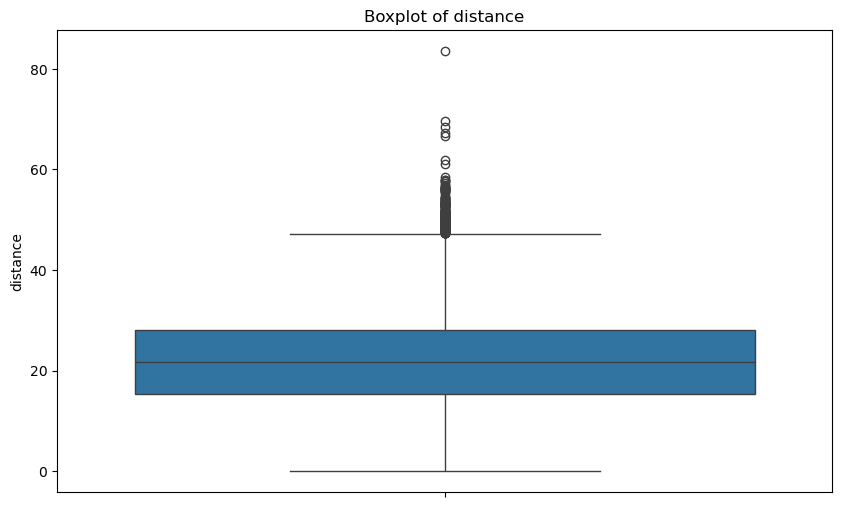

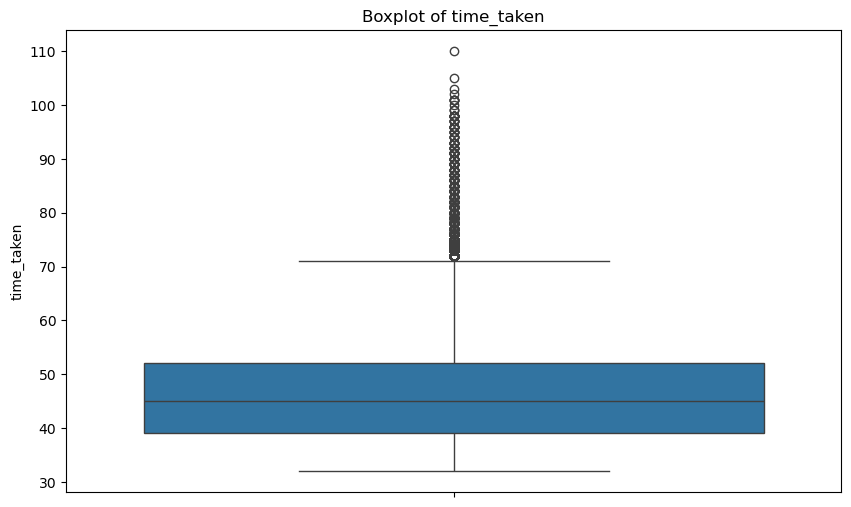

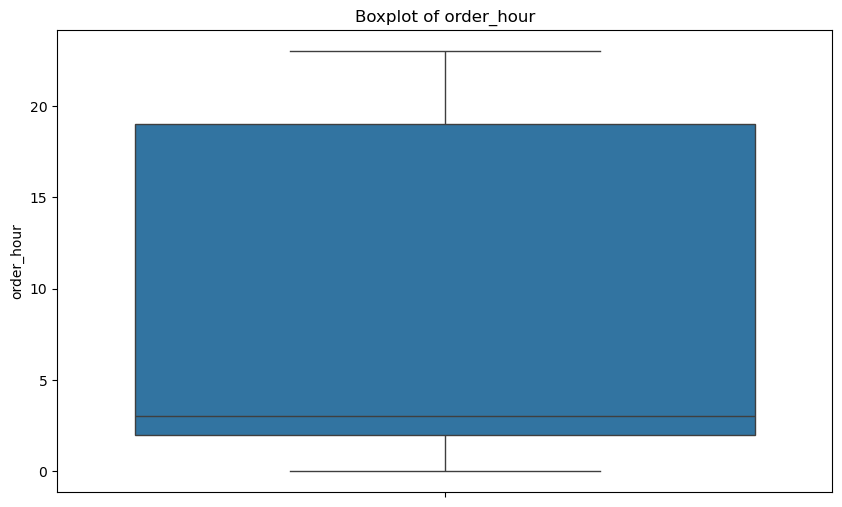

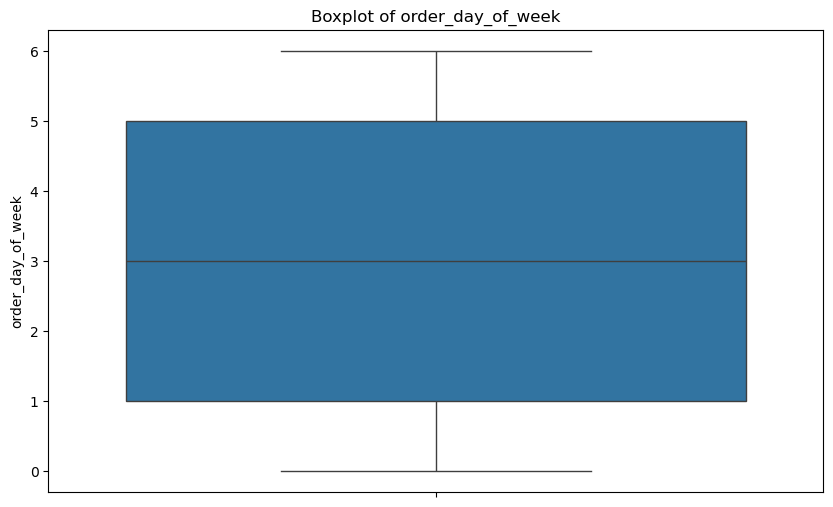

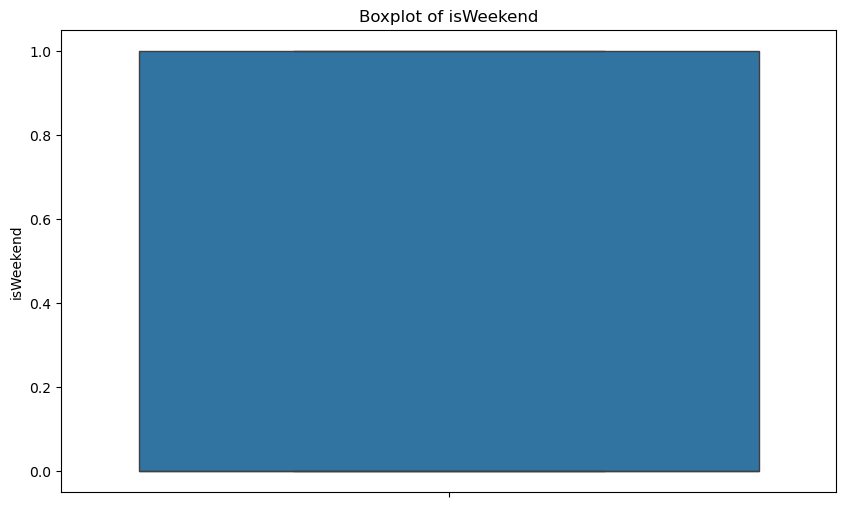

In [57]:
# Boxplot for time_taken

# Visualising potential outliers for the target variable and other numerical features using boxplots
numerical_features = data.select_dtypes(include=[np.number]).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

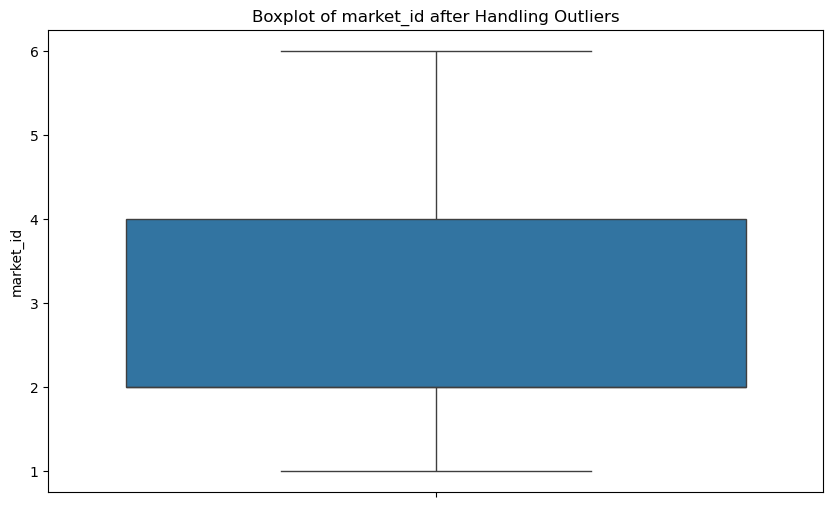

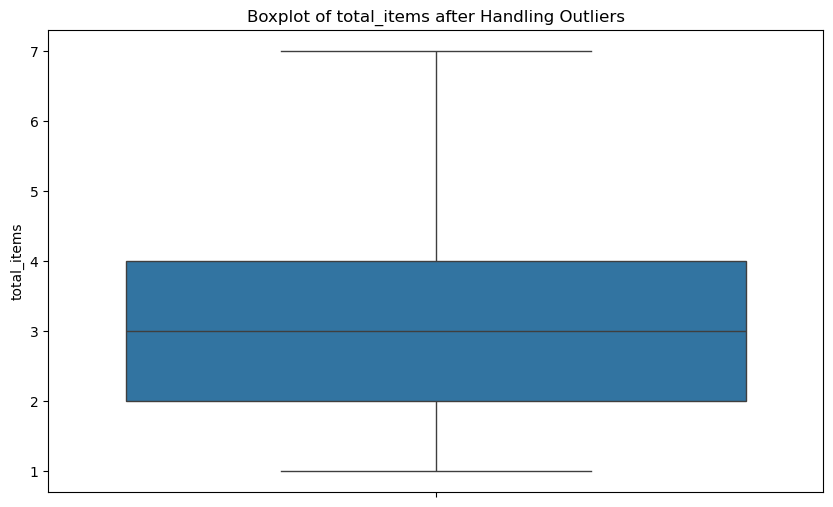

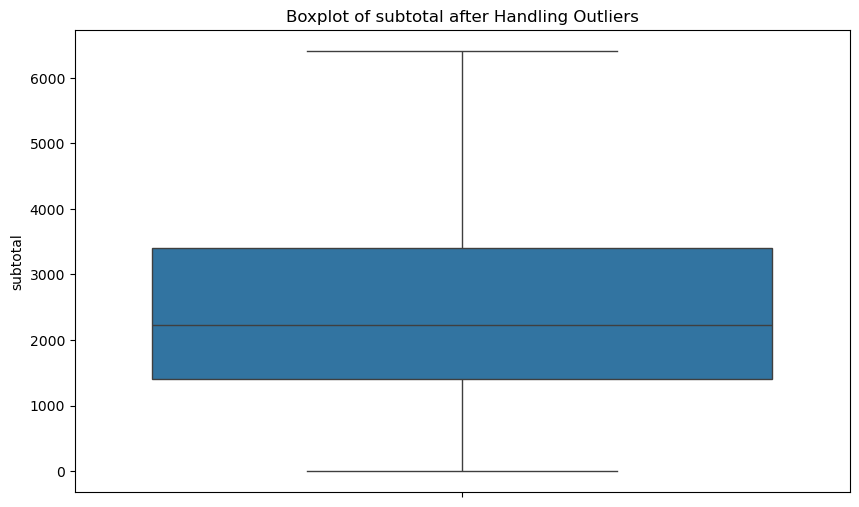

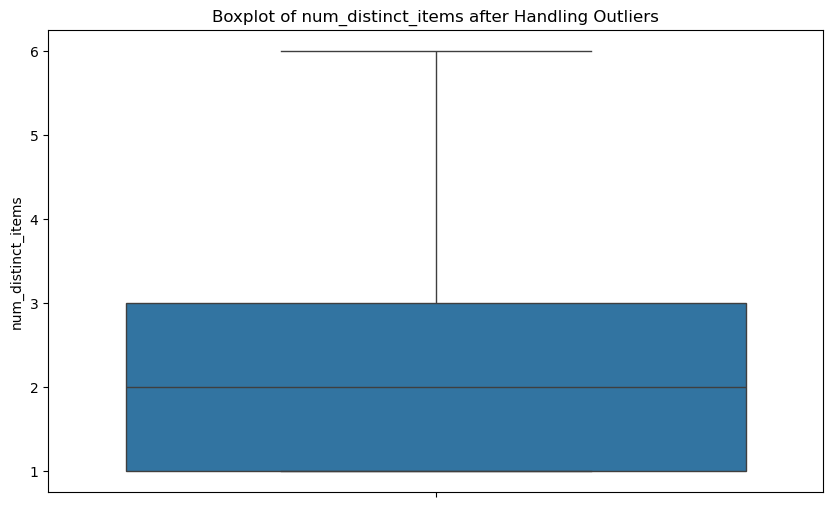

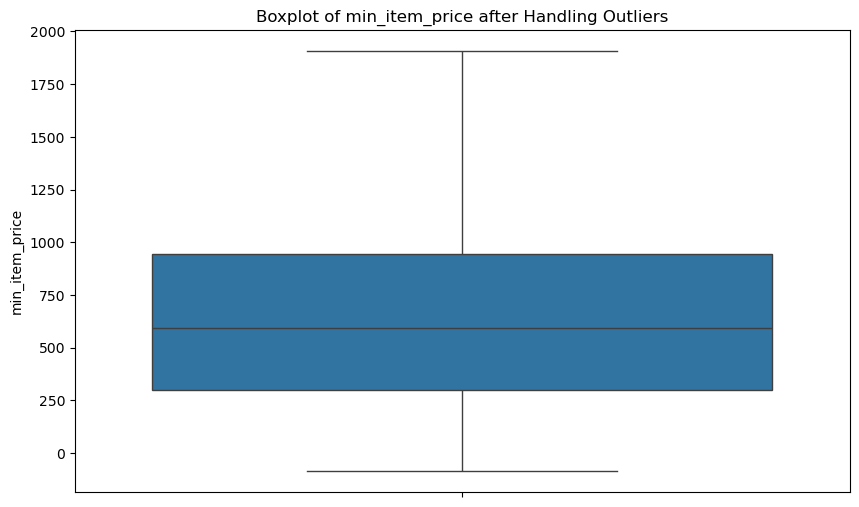

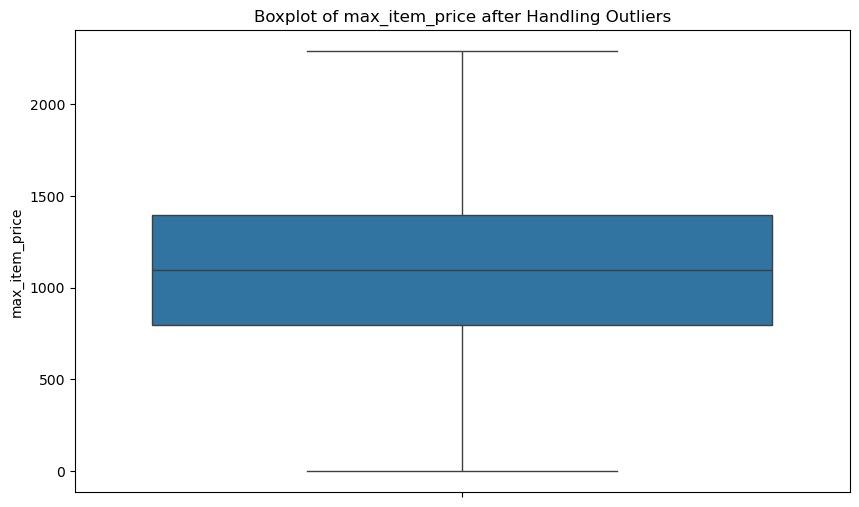

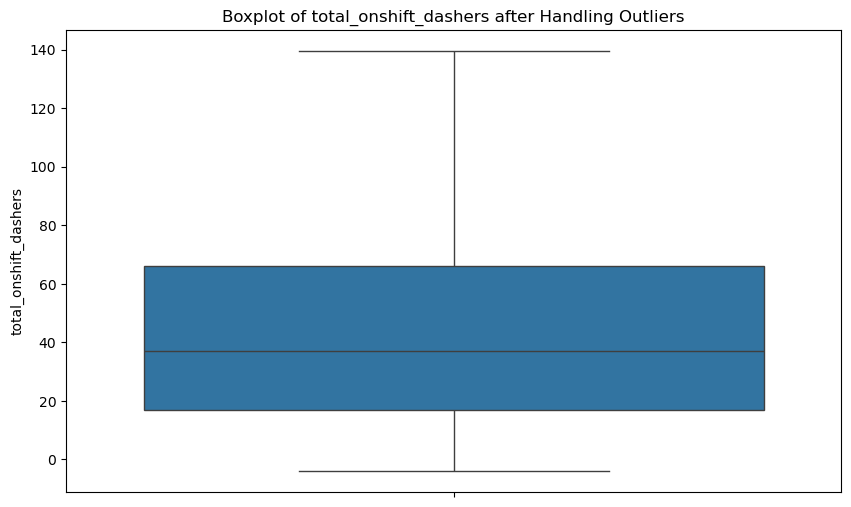

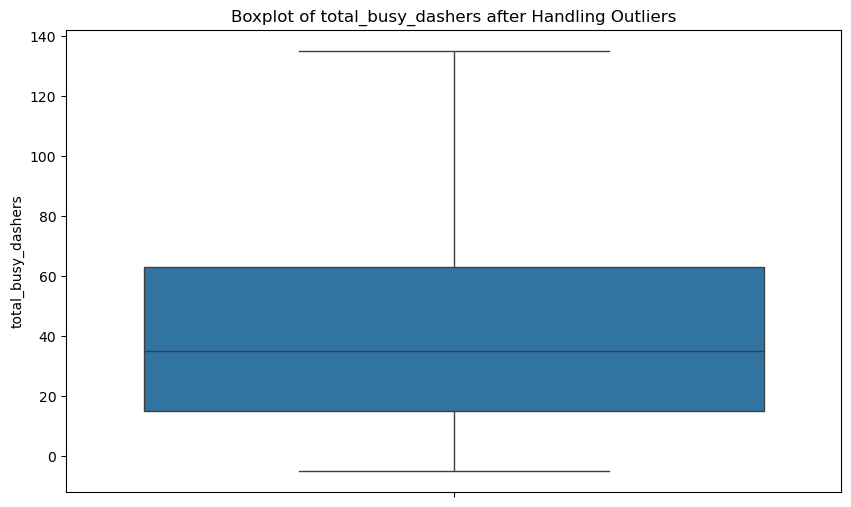

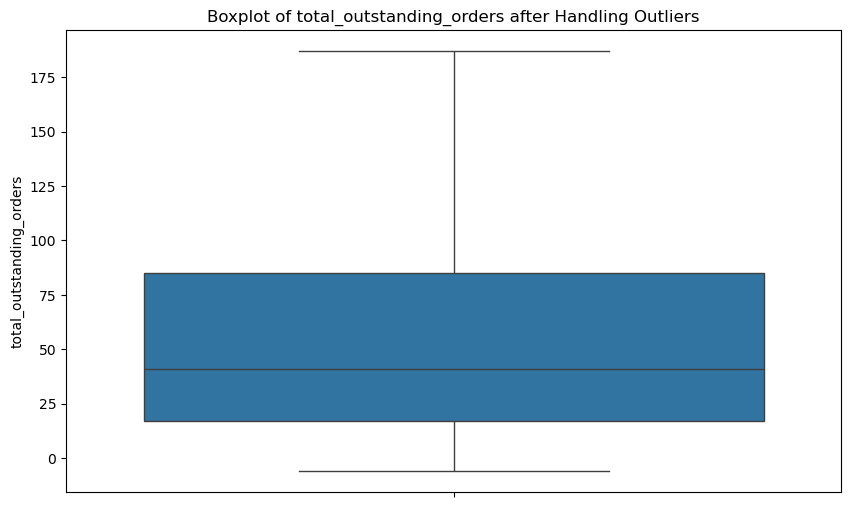

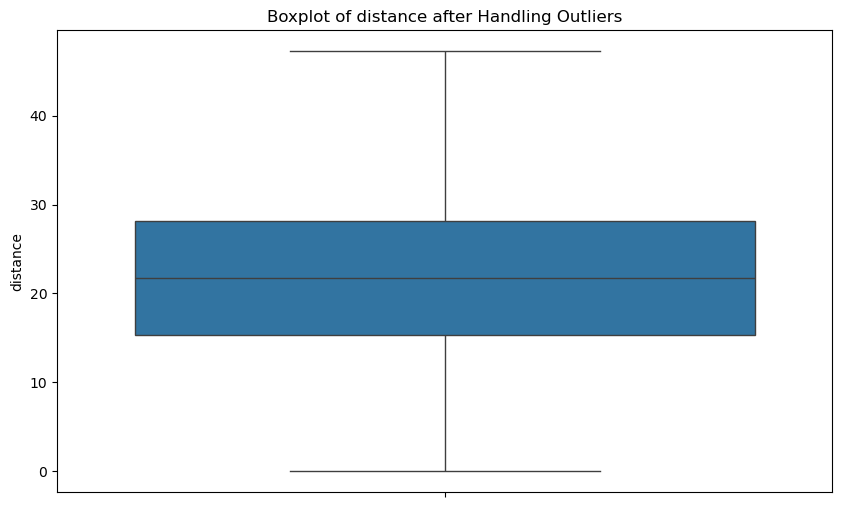

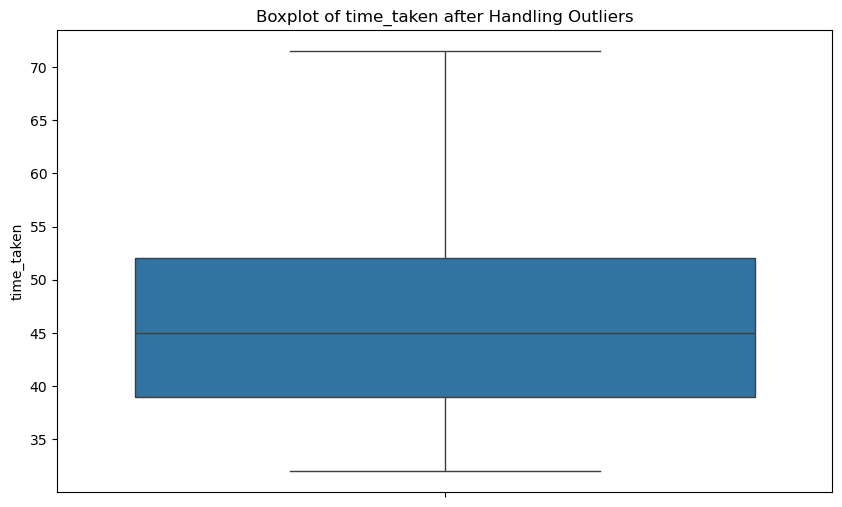

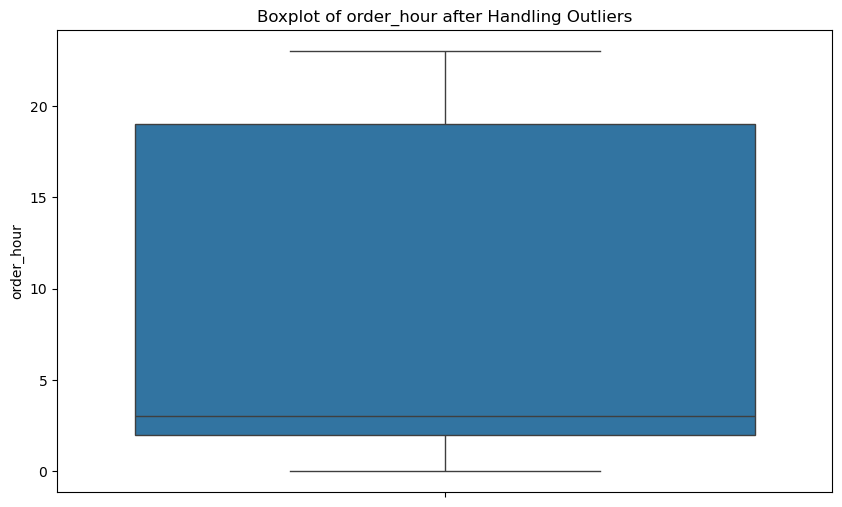

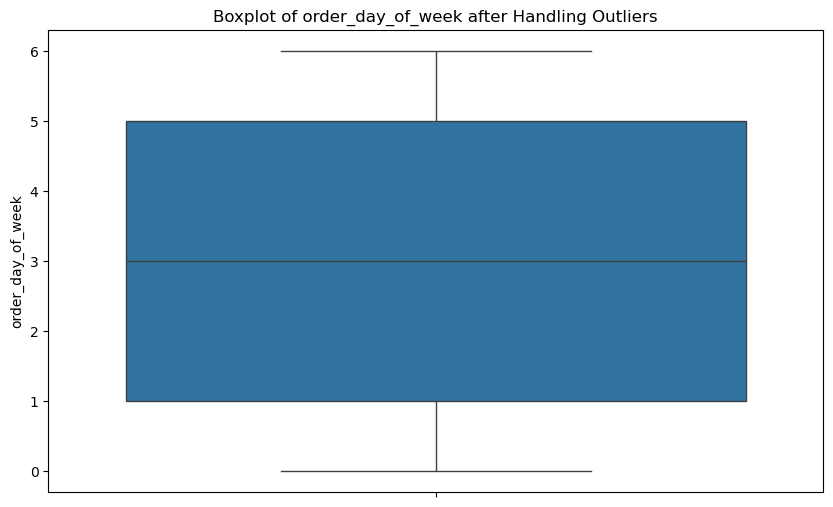

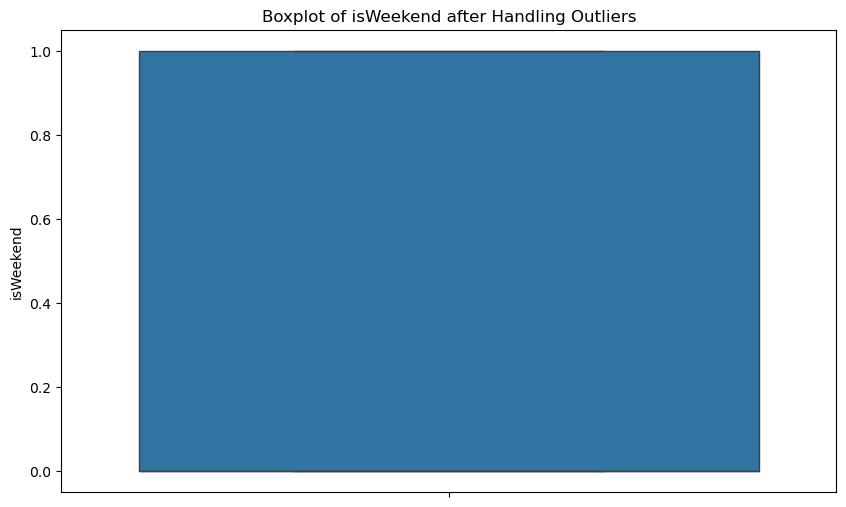

In [60]:
# Handle outliers

# Handling outliers in all columns
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for feature in numerical_features:
    data = handle_outliers(data, feature)

# Visualising potential outliers for the target variable and other numerical features using boxplots after handling outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature} after Handling Outliers')
    plt.ylabel(feature)
    plt.show()


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [63]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken', 'order_hour', 'order_day_of_week', 'isWeekend']
Categorical columns: []


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [67]:
# Plot distributions for all numerical columns
for feature in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[feature], order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()


##### **4.1.2**
Check the distribution of categorical features

In [70]:
# Distribution of categorical columns


# Checking the distribution of categorical features
categorical_features = ['store_primary_category', 'order_protocol']

for feature in categorical_features:
    print(f"Distribution of {feature}:")
    print(data[feature].value_counts())
    print("\n")


Distribution of store_primary_category:
store_primary_category
4     18183
55    15745
46    15586
13     9915
58     8995
      ...  
1        10
43        9
8         2
3         1
21        1
Name: count, Length: 73, dtype: int64


Distribution of order_protocol:
order_protocol
1.0    48404
3.0    47125
5.0    41415
2.0    20890
4.0    17246
6.0      678
7.0       19
Name: count, dtype: int64




##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [73]:
# Distribution of time_taken

# Plot distributions for categorical columns
for feature in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[feature], order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

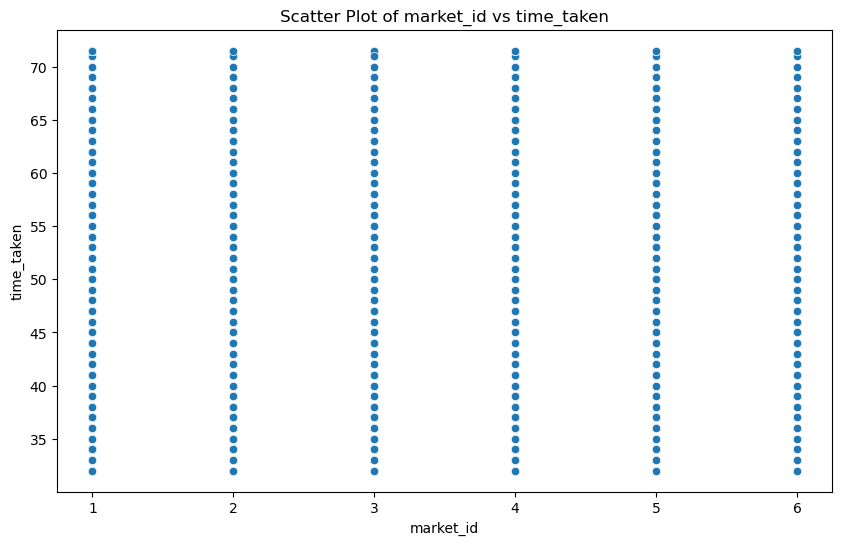

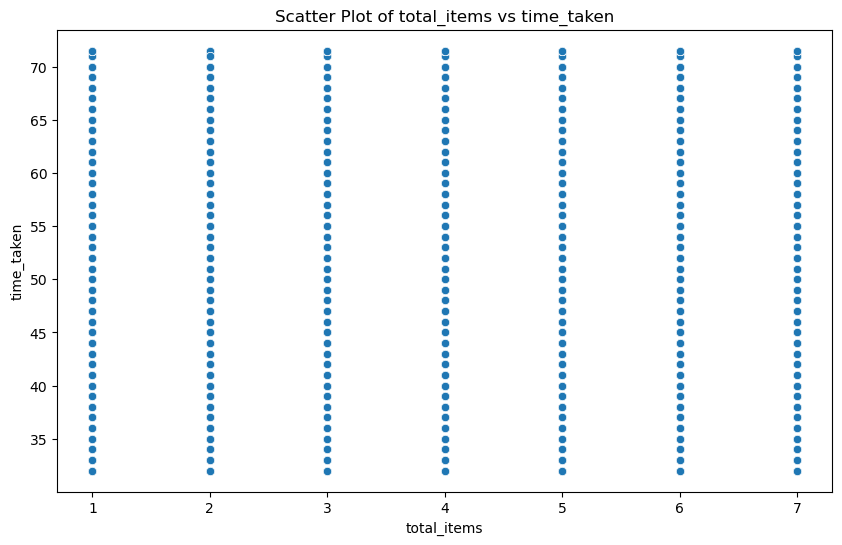

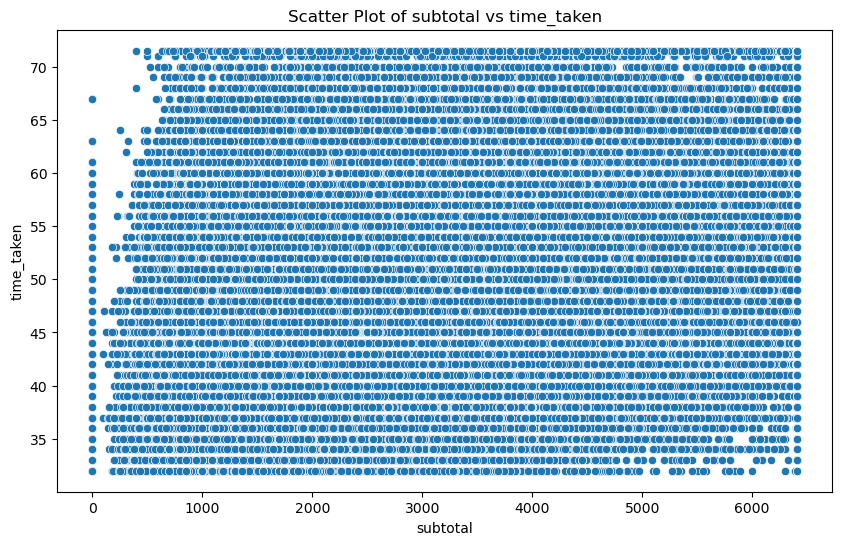

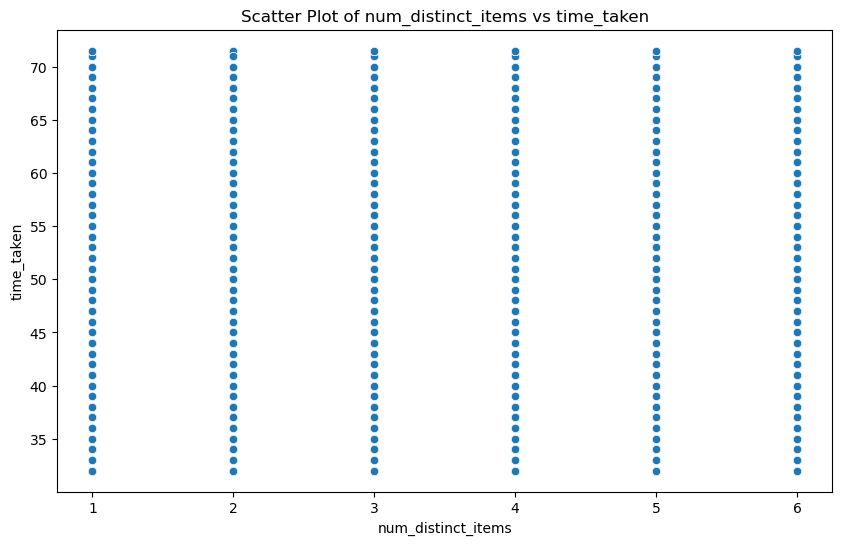

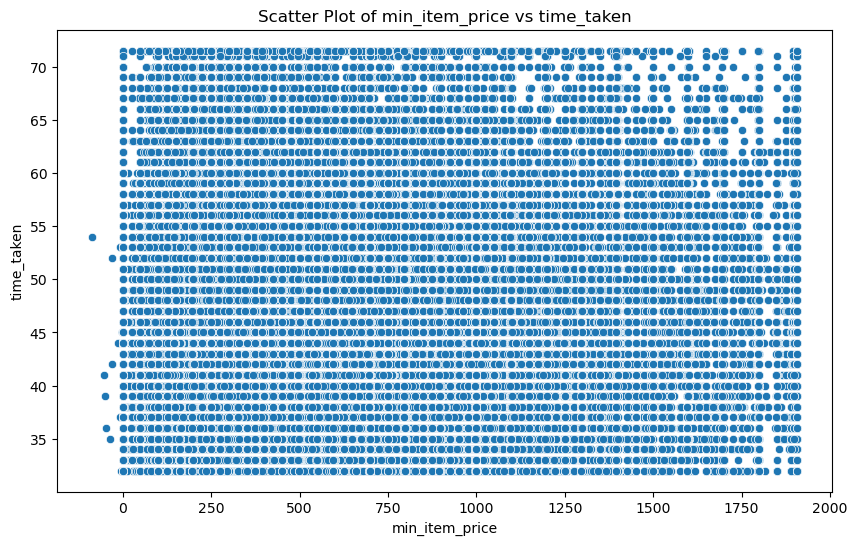

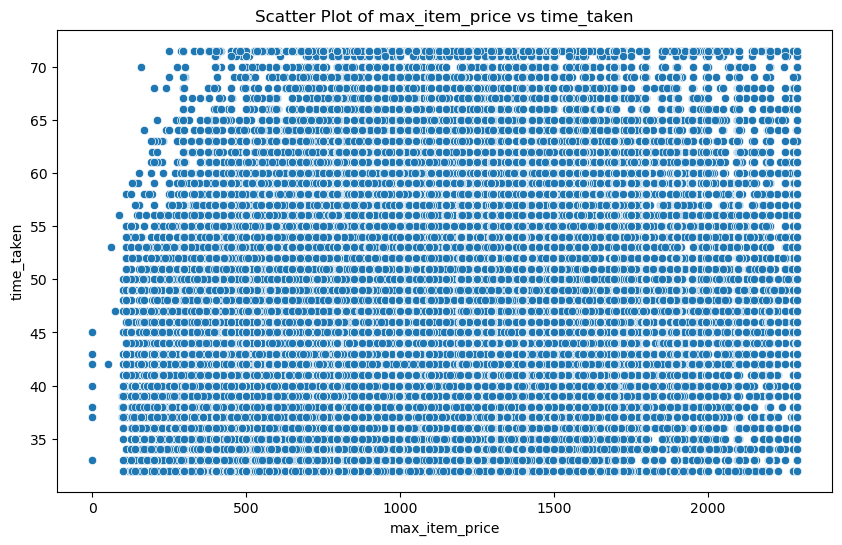

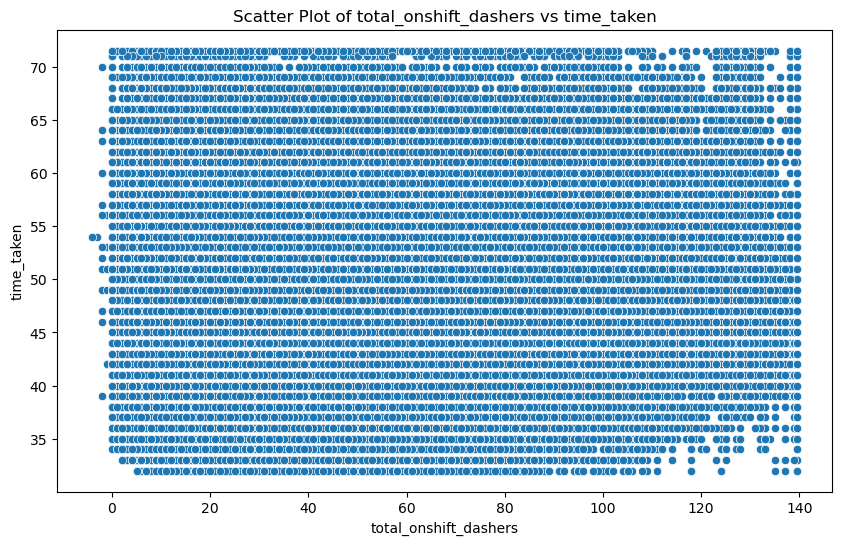

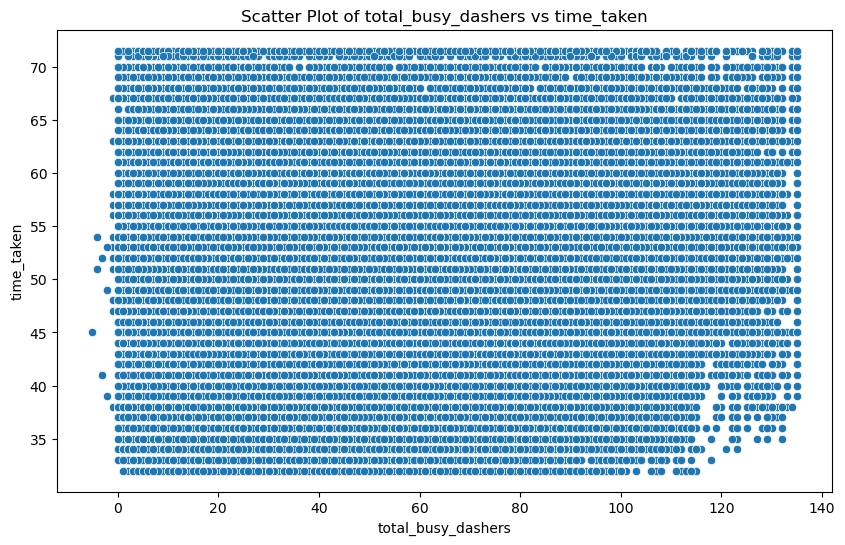

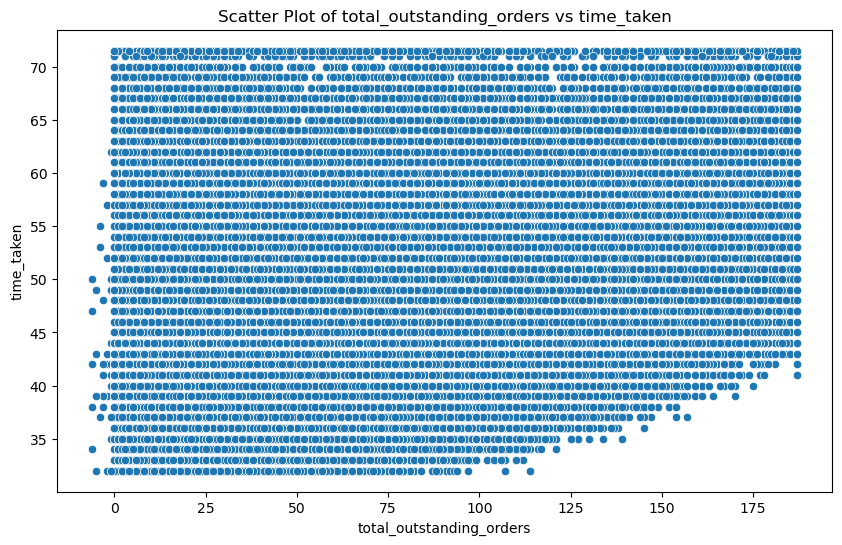

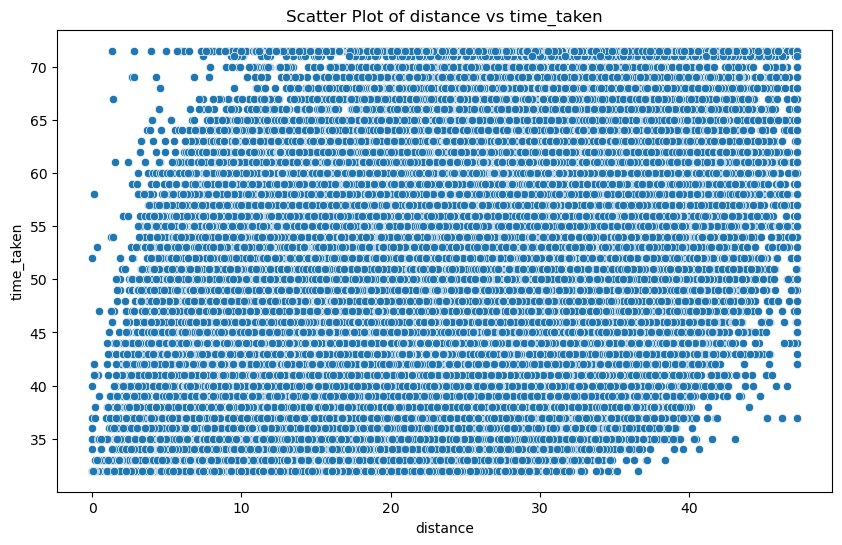

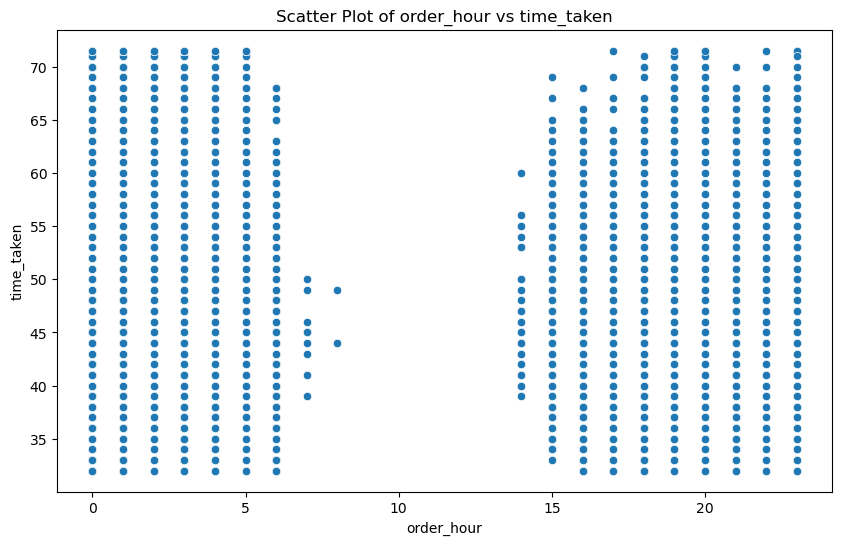

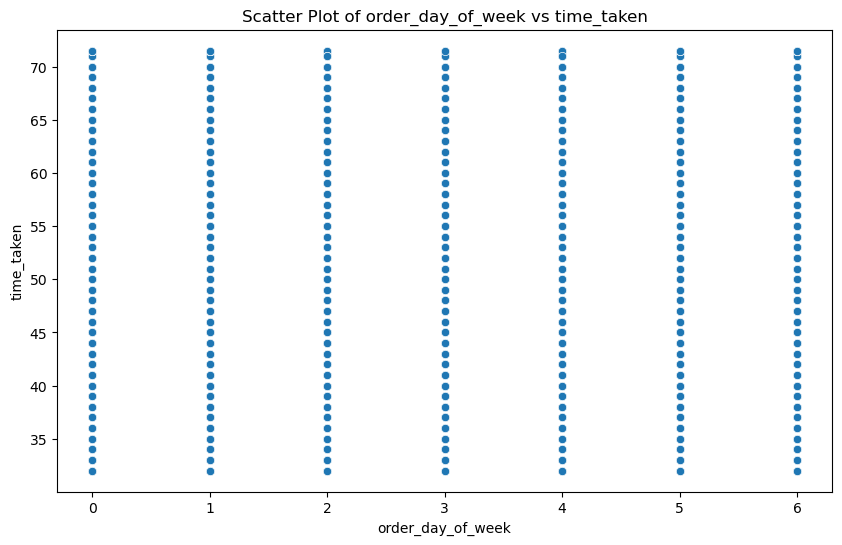

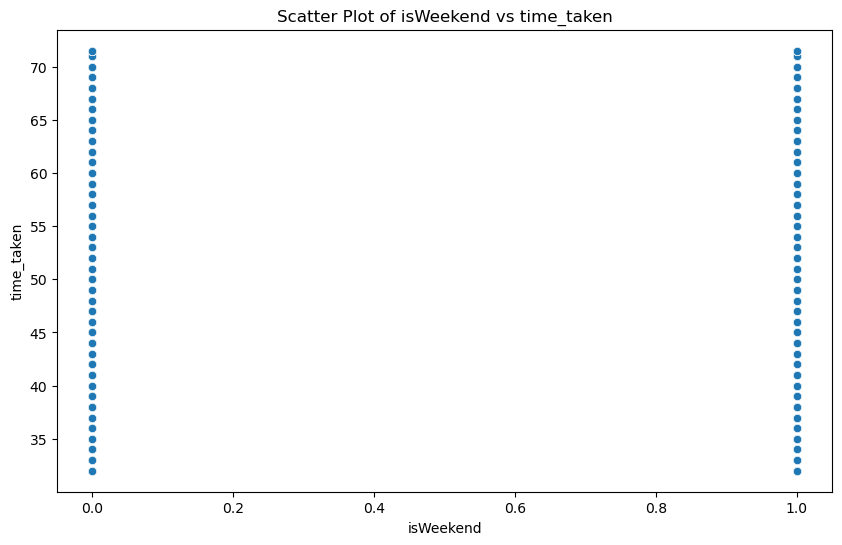

In [76]:
# Scatter plot to visualise the relationship between time_taken and other features
for feature in numerical_columns:
    if feature != 'time_taken':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data[feature], y=data['time_taken'])
        plt.title(f'Scatter Plot of {feature} vs {'time_taken'}')
        plt.xlabel(feature)
        plt.ylabel('time_taken')
        plt.show()

for feature in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data['time_taken'])
    plt.title(f'Scatter Plot of {feature} vs {'time_taken'}')
    plt.xlabel(feature)
    plt.ylabel('time_taken')
    plt.show()


In [77]:

# Dropping weakly correlated columns from training dataset
training_data = data.drop(columns=weak_correlations)
print("Training data columns after dropping weak correlations:", training_data.columns)

# Splitting the data into training and validation sets
X = training_data.drop(columns=[target_variable])
y = training_data[target_variable]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Training data columns after dropping weak correlations: Index(['store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'time_taken', 'order_hour', 'isWeekend'],
      dtype='object')


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [82]:
# Import libraries

already imported

SyntaxError: invalid syntax (3965645840.py, line 3)

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [85]:
# Apply scaling to the numerical columns



# Standardizing the numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])


KeyError: "['market_id', 'min_item_price', 'time_taken', 'order_day_of_week'] not in index"

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [90]:
# Create/Initialise the model

# Building a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [92]:
# Train the model using the training data


In [94]:
# Make predictions

# Making predictions on the validation set
y_pred = model.predict(X_val)


In [96]:
# Find results for evaluation metrics


# Evaluating the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)


In [98]:

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the actual vs predicted values

Mean Squared Error: 11.614441302237337
R-squared: 0.8608384022543051


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

In [102]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [104]:

# Adding a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)
X_val_sm = sm.add_constant(X_val)

# Building a linear regression model using statsmodels
model = sm.OLS(y_train, X_train_sm).fit()

# Printing the summary of the model to get p-values
print(model.summary())

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm, i) for i in range(X_train_sm.shape[1])]

print(vif_data)


                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 7.062e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:42:22   Log-Likelihood:            -3.7333e+05
No. Observations:              140621   AIC:                         7.467e+05
Df Residuals:                  140608   BIC:                         7.468e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

Mean Squared Error: 11.614441302237356
R-squared: 0.8608384022543049


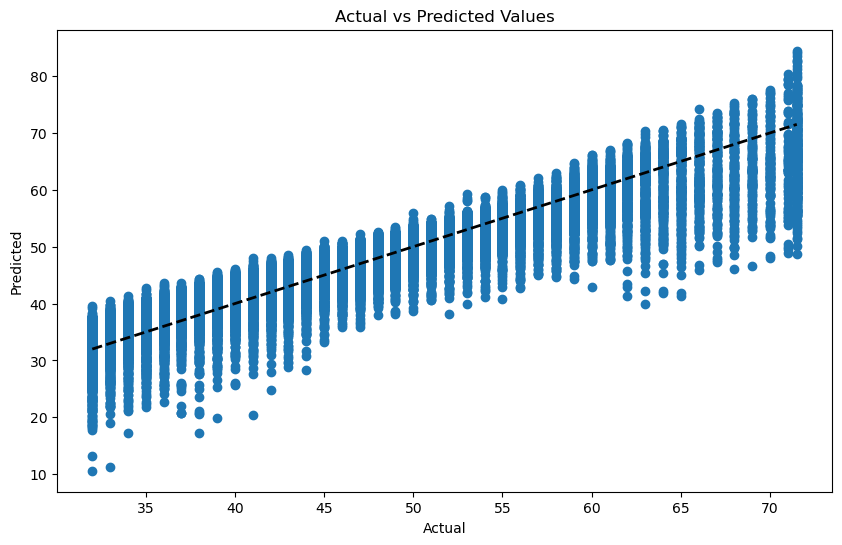

In [107]:

# Making predictions on the validation set
y_pred = model.predict(X_val_sm)

# Evaluating the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

    Number of Features        MSE  R-squared
0                    1  83.460432  -0.000004
1                    2  83.386452   0.000882
2                    3  81.828046   0.019555
3                    4  75.210081   0.098850
4                    5  67.745285   0.188291
5                    6  67.451028   0.191817
6                    7  67.263431   0.194065
7                    8  65.994051   0.209274
8                    9  64.261842   0.230029
9                   10  32.294822   0.613051
10                  11  15.536190   0.813849
11                  12  12.223265   0.853544
12                  13  11.614441   0.860838


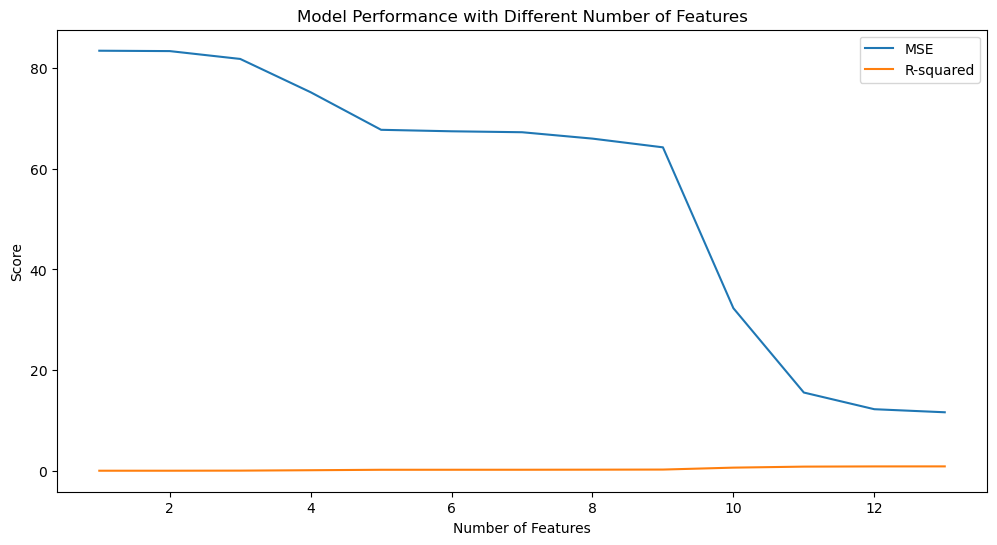

In [109]:
# Loop through the number of features and test the model



results = []
for i in range(1, len(X_train_sm.columns) + 1):
    model = sm.OLS(y_train, X_train_sm.iloc[:, :i]).fit()
    y_pred = model.predict(X_val_sm.iloc[:, :i])
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    results.append((i, mse, r2))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Number of Features', 'MSE', 'R-squared'])

print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(results_df['Number of Features'], results_df['MSE'], label='MSE')
plt.plot(results_df['Number of Features'], results_df['R-squared'], label='R-squared')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('Model Performance with Different Number of Features')
plt.legend()
plt.show()

In [111]:
# Build the final model with selected number of features



## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [115]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram


# Calculate residuals
residuals = y_test - y_pred


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


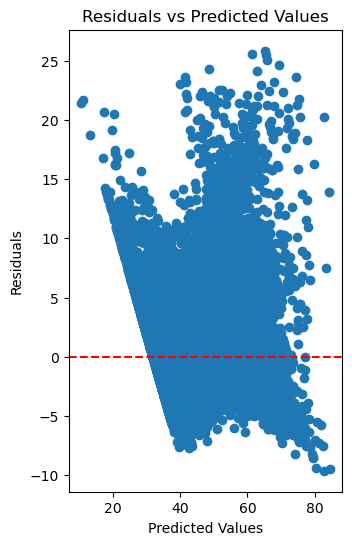

In [120]:
# Compare the scaled vs unscaled features used in the final model

# 1. Residuals vs Predicted Values Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

Text(0.5, 1.0, 'Q-Q Plot')

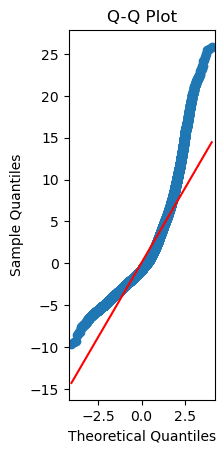

In [123]:
# Analyze the effect of a unit change in a feature, say 'total_items'


# 2. Q-Q Plot
plt.subplot(1, 3, 2)
sm.qqplot(residuals, line='s',ax=plt.gca())
plt.title('Q-Q Plot')



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

AttributeError: module 'statsmodels.api' has no attribute 'norm'

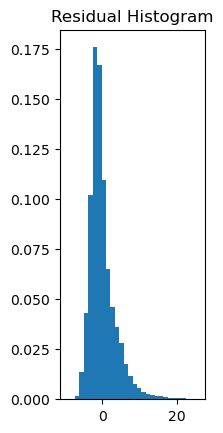

In [126]:

# 3. Residual Histogram
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=30, density=True)
plt.title('Residual Histogram')

# Overlay a normal distribution curve
mu, std = residuals.mean(), residuals.std()
x = np.linspace(residuals.min(), residuals.max(), 100)
p = sm.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.tight_layout()
plt.show()

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Store_primary_category,order_protocol and is_Weekend hsve P>|t| value of 0.000 indicating their effects on the delivery times are statistically significant at a very high level



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2 means that 20% of the data will be used for the test set, and the remaining 80% will be used for the training set.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>distance



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>My approach to detect outliers involved using the Isolation Forest algorithm. To address them, I removed the detected outliers from the dataset.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>total_busy_dashers,distance,total_onshift_dashers



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is a linear approach for modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

Types:

Simple Linear Regression: Uses a single independent variable to predict the dependent variable.
Multiple Linear Regression: Uses two or more independent variables to predict the dependent variable.
Goal:

To find the best-fitting line (or hyperplane in multiple regression) that minimizes the difference between the predicted values and the actual values.

How it Works:

Data Preparation: Collect and prepare your data, ensuring it's clean and relevant.
Model Representation: The relationship is modeled as a linear equation:
Simple Linear Regression: y = mx + b
Multiple Linear Regression: y = b0 + b1x1 + b2x2 + ... + bnxn
Where:
y is the predicted value of the dependent variable.
x is the independent variable(s).
m is the slope of the line (simple).
b is the y-intercept (simple) or the bias (multiple).
b0 is the y-intercept (multiple).
b1, b2, ..., bn are the coefficients for each independent variable (multiple).
Cost Function: A cost function (e.g., Mean Squared Error) measures the difference between the predicted values and the actual values. The goal is to minimize this cost.
Optimization: Optimization algorithms (e.g., Gradient Descent) are used to find the values of the coefficients (m, b or b0, b1, etc.) that minimize the cost function. Gradient descent iteratively updates the coefficients by moving in the direction of the steepest decrease in the cost function.
Prediction: Once the model is trained (i.e., the coefficients are determined), it can be used to predict the dependent variable for new values of the independent variable(s).
Evaluation: Evaluate the model's performance using metrics like R-squared, Mean Absolute Error, or Root Mean Squared Error.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple linear regression uses one independent variable to predict a dependent variable, while multiple linear regression uses two or more independent variables to predict a dependent variable.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>
The cost function in linear regression quantifies the error between predicted and actual values. It's minimized to find the optimal parameters for the linear model. Common methods include:

Ordinary Least Squares (OLS): A direct method to find the parameters that minimize the sum of squared errors.
Gradient Descent: An iterative optimization algorithm that adjusts parameters in the direction of the steepest decrease in the cost function.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting: The model learns the training data too well, capturing noise and outliers, leading to poor generalization on unseen data. High variance, low bias.

Underfitting: The model is too simple to capture the underlying patterns in the training data, resulting in poor performance on both training and unseen data. High bias, low variance.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots help diagnose linear regression models by revealing patterns that indicate violations of regression assumptions, such as:

Non-linearity: A curved pattern suggests the relationship is not linear.
Non-constant variance (heteroscedasticity): A funnel shape indicates unequal error variances.
Outliers: Points far from zero may be outliers.
Non-independence of errors: Patterns over time or other variables suggest correlated errors.
Non-normality of errors: While harder to assess, deviations from a random scatter around zero can suggest non-normal errors.